<a href="https://colab.research.google.com/github/andrix17/proWine/blob/main/notebook/ProWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ProWine Project
## Analisi Descrittiva
Script R per analisi descrittiva delle varietà dei vini usando un dataset di recensioni preso da Kaggle https://www.kaggle.com/zynicide/wine-reviews

In [1]:
install.packages("lsa")
install.packages("tm")
install.packages("RWeka")
install.packages("stopwords")
library(tm)
library(lsa)
library(RWeka)
library(stopwords)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘SnowballC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ISOcodes’


Loading required package: NLP

Loading required package: SnowballC


Attaching package: ‘stopwords’


The following object is masked from ‘package:tm’:

    stopwords




In [2]:
download.file('https://raw.githubusercontent.com/andrix17/proWine/main/dataset/winemag-data-130k-v2.csv?token=AMASMT6SWWUQDUY3EEZJWD3AGZUK6','wineData.csv')

In [3]:
wineData <- read.csv('wineData.csv')

In [4]:
head(wineData)

X country 
1 0 Italy   
2 1 Portugal
3 2 US      
4 3 US      
5 4 US      
6 5 Spain   
  description                                                                                                                                                                                                                                                          
1 Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.                                                                                         
2 This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.                                  
3 Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.                                                                           
4 Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.                                                              
5 Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.            
6 Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.
  designation                        points price province         
1 Vulkà Bianco                       87     NA    Sicily & Sardinia
2 Avidagos                           87     15    Douro            
3                                    87     14    Oregon           
4 Reserve Late Harvest               87     13    Michigan         
5 Vintner's Reserve Wild Child Block 87     65    Oregon           
6 Ars In Vitro                       87     15    Northern Spain   
  region_1            region_2          taster_name       
1 Etna                                  Kerin O’Keefe     
2                                       Roger Voss        
3 Willamette Valley   Willamette Valley Paul Gregutt      
4 Lake Michigan Shore                   Alexander Peartree
5 Willamette Valley   Willamette Valley Paul Gregutt      
6 Navarra                               Michael Schachner 
  taster_twitter_handle
1 @kerinokeefe         
2 @vossroger           
3 @paulgwine           
4                      
5 @paulgwine           
6 @wineschach          
  title                                                                              
1 Nicosia 2013 Vulkà Bianco  (Etna)                                                  
2 Quinta dos Avidagos 2011 Avidagos Red (Douro)                                      
3 Rainstorm 2013 Pinot Gris (Willamette Valley)                                      
4 St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore)                
5 Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley)
6 Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra)                              
  variety            winery             
1 White Blend        Nicosia            
2 Portuguese Red     Quinta dos Avidagos
3 Pinot Gris         Rainstorm          
4 Riesling           St. Julian         
5 Pinot Noir         Sweet Cheeks       
6 Tempranillo-Merlot Tandem

In [18]:
nrow(wineData)

[1] 129971

In [19]:
wineData <- wineData[!duplicated(wineData$description), ]

In [20]:
nrow(wineData)

[1] 119955

In [22]:
variety = wineData$variety
reviews = wineData$description
head(sort(table(variety), decreasing = T),30)

variety
                Pinot Noir                 Chardonnay 
                     12277                      10867 
        Cabernet Sauvignon                  Red Blend 
                      8837                       8239 
  Bordeaux-style Red Blend                   Riesling 
                      6469                       4773 
           Sauvignon Blanc                      Syrah 
                      4574                       3826 
                      Rosé                     Merlot 
                      3220                       2895 
                  Nebbiolo                  Zinfandel 
                      2602                       2530 
                Sangiovese                     Malbec 
                      2460                       2446 
            Portuguese Red                White Blend 
                      2282                       2179 
           Sparkling Blend                Tempranillo 
                      1971                       1671 
  

In [23]:
corpus <- Corpus(VectorSource(reviews))
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.                                                                             
[2] This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.                      
[3] Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.                                                               
[4] Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled gua

In [24]:
corpus <- tm_map(corpus, tolower)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] aromas include tropical fruit, broom, brimstone and dried herb. the palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.                                                                             
[2] this is ripe and fruity, a wine that is smooth while still structured. firm tannins are filled out with juicy red berry fruits and freshened with acidity. it's  already drinkable, although it will certainly be better from 2016.                      
[3] tart and snappy, the flavors of lime flesh and rind dominate. some green pineapple pokes through, with crisp acidity underscoring the flavors. the wine was all stainless-steel fermented.                                                               
[4] pineapple rind, lemon pith and orange blossom start off the aromas. the palate is a bit more opulent, with notes of honey-drizzled gua

In [25]:
stopwordlist <- stopwords::stopwords("en", source= "nltk")#Snowball, marimo, nltk, stopwords-iso, smart
corpus <- tm_map(corpus, removeWords, stopwordlist)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwordlist):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] aromas include tropical fruit, broom, brimstone  dried herb.  palate  overly expressive, offering unripened apple, citrus  dried sage alongside brisk acidity.                                                   
[2]   ripe  fruity,  wine   smooth  still structured. firm tannins  filled   juicy red berry fruits  freshened  acidity.   already drinkable, although   certainly  better  2016.                                    
[3] tart  snappy,  flavors  lime flesh  rind dominate.  green pineapple pokes ,  crisp acidity underscoring  flavors.  wine   stainless-steel fermented.                                                             
[4] pineapple rind, lemon pith  orange blossom start   aromas.  palate   bit  opulent,  notes  honey-drizzled guava  mango giving way   slightly astringent, semidry finish.                                         
[5] much like  regular bottling  2012,  come

In [26]:
corpus <- tm_map(corpus, removePunctuation)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] aromas include tropical fruit broom brimstone  dried herb  palate  overly expressive offering unripened apple citrus  dried sage alongside brisk acidity                                                 
[2]   ripe  fruity  wine   smooth  still structured firm tannins  filled   juicy red berry fruits  freshened  acidity   already drinkable although   certainly  better  2016                                 
[3] tart  snappy  flavors  lime flesh  rind dominate  green pineapple pokes   crisp acidity underscoring  flavors  wine   stainlesssteel fermented                                                           
[4] pineapple rind lemon pith  orange blossom start   aromas  palate   bit  opulent  notes  honeydrizzled guava  mango giving way   slightly astringent semidry finish                                       
[5] much like  regular bottling  2012  comes across  rather rough  tannic  r

In [27]:
tdmc <- TermDocumentMatrix(corpus)

In [28]:
tdmc

<<TermDocumentMatrix (terms: 43754, documents: 119955)>>
Non-/sparse entries: 2885845/5245625225
Sparsity           : 100%
Maximal term length: 47
Weighting          : term frequency (tf)

In [29]:
3125556/(5683625578+3125556)*100 #percentuale di elementi non nulli

[1] 0.05496207

In [30]:
tdmTemp <- removeSparseTerms(tdmc, 0.995)
tdmTemp

<<TermDocumentMatrix (terms: 759, documents: 119955)>>
Non-/sparse entries: 2153310/88892535
Sparsity           : 98%
Maximal term length: 15
Weighting          : term frequency (tf)

In [31]:
words <- rownames(tdmTemp)
words

[1] "acidity"         "alongside"       "apple"           "aromas"         
  [5] "brisk"           "citrus"          "dried"           "fruit"          
  [9] "herb"            "include"         "offering"        "palate"         
 [13] "sage"            "tropical"        "2016"            "already"        
 [17] "although"        "berry"           "better"          "certainly"      
 [21] "drinkable"       "firm"            "fruits"          "fruity"         
 [25] "juicy"           "red"             "ripe"            "smooth"         
 [29] "still"           "structured"      "tannins"         "wine"           
 [33] "crisp"           "dominate"        "fermented"       "flavors"        
 [37] "green"           "lime"            "pineapple"       "rind"           
 [41] "tart"            "astringent"      "bit"             "blossom"        
 [45] "finish"          "giving"          "lemon"           "mango"          
 [49] "notes"           "opulent"         "orange"          "pith"           
 [53] "slightly"        "start"           "way"             "across"         
 [57] "bottling"        "comes"           "earthy"          "good"           
 [61] "hearty"          "herbal"          "like"            "much"           
 [65] "rather"          "rough"           "rustic"          "tannic"         
 [69] "blackberry"      "bodied"          "dark"            "fairly"         
 [73] "fresh"           "full"            "herbs"           "mouth"          
 [77] "plum"            "raspberry"       "show"            "spicy"          
 [81] "typical"         "whiff"           "balanced"        "bright"         
 [85] "candied"         "carry"           "opens"           "pepper"         
 [89] "savory"          "soft"            "white"           "dry"            
 [93] "food"            "offers"          "restrained"      "spice"          
 [97] "texture"         "accent"          "elegant"         "peach"          
[101] "thyme"           "depth"           "drink"           "flavor"         
[105] "great"           "pear"            "touch"           "attractive"     
[109] "cabernet"        "chocolate"       "coffee"          "end"            
[113] "finishing"       "merlot"          "oaky"            "strong"         
[117] "structure"       "supple"          "aftertaste"      "almost"         
[121] "character"       "layered"         "mineral"         "strongly"       
[125] "taut"            "tight"           "well"            "accented"       
[129] "backbone"        "black"           "chalky"          "cherry"         
[133] "oak"             "otherwise"       "rich"            "throughout"     
[137] "whole"           "bean"            "coconut"         "dominated"      
[141] "drying"          "espresso"        "give"            "roasted"        
[145] "together"        "vanilla"         "approachable"    "aroma"          
[149] "california"      "classic"         "cut"             "everyday"       
[153] "range"           "six"             "style"           "toward"         
[157] "winery"          "years"           "appeal"          "easy"           
[161] "lean"            "racy"            "refreshing"      "riesling"       
[165] "yet"             "zesty"           "accents"         "baked"          
[169] "balance"         "balsamic"        "compact"         "features"       
[173] "peppery"         "redberry"        "set"             "tobacco"        
[177] "weight"          "feel"            "finishes"        "hot"            
[181] "meaty"           "profile"         "raw"             "simple"         
[185] "time"            "charred"         "clove"           "fullbodied"     
[189] "leather"         "mint"            "nose"            "top"            
[193] "wood"            "back"            "blend"           "crushed"        
[197] "franc"           "menthol"         "ready"           "sauvignon"      
[201] "ample"           "berries"         "currant"         "dusty"          
[205] "toasted"         

In [32]:
tdm <-as.matrix(tdmTemp)

In [33]:
tdmPesata <-lw_logtf(tdm) * ( 1 - entropy( tdm ) )

In [34]:
lsar <- lsa(tdmPesata)

In [35]:
length(lsar$sk)

[1] 302

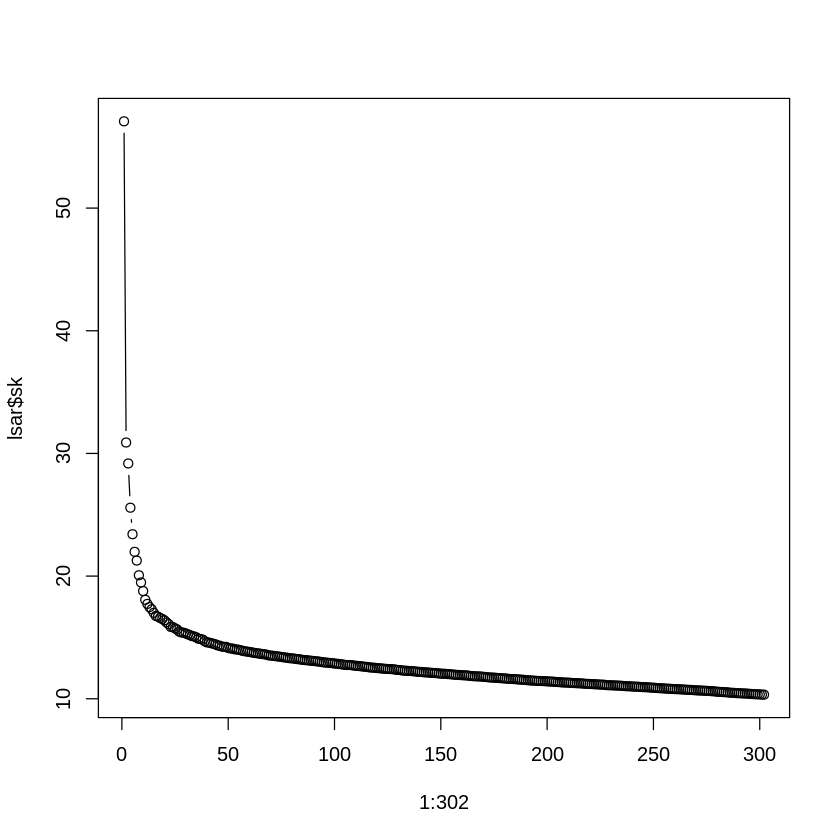

In [37]:
plot(1:302, lsar$sk, type="b")

In [38]:
tls <- lsar$tk %*% diag(lsar$sk)
dls <- lsar$dk %*% diag(lsar$sk)

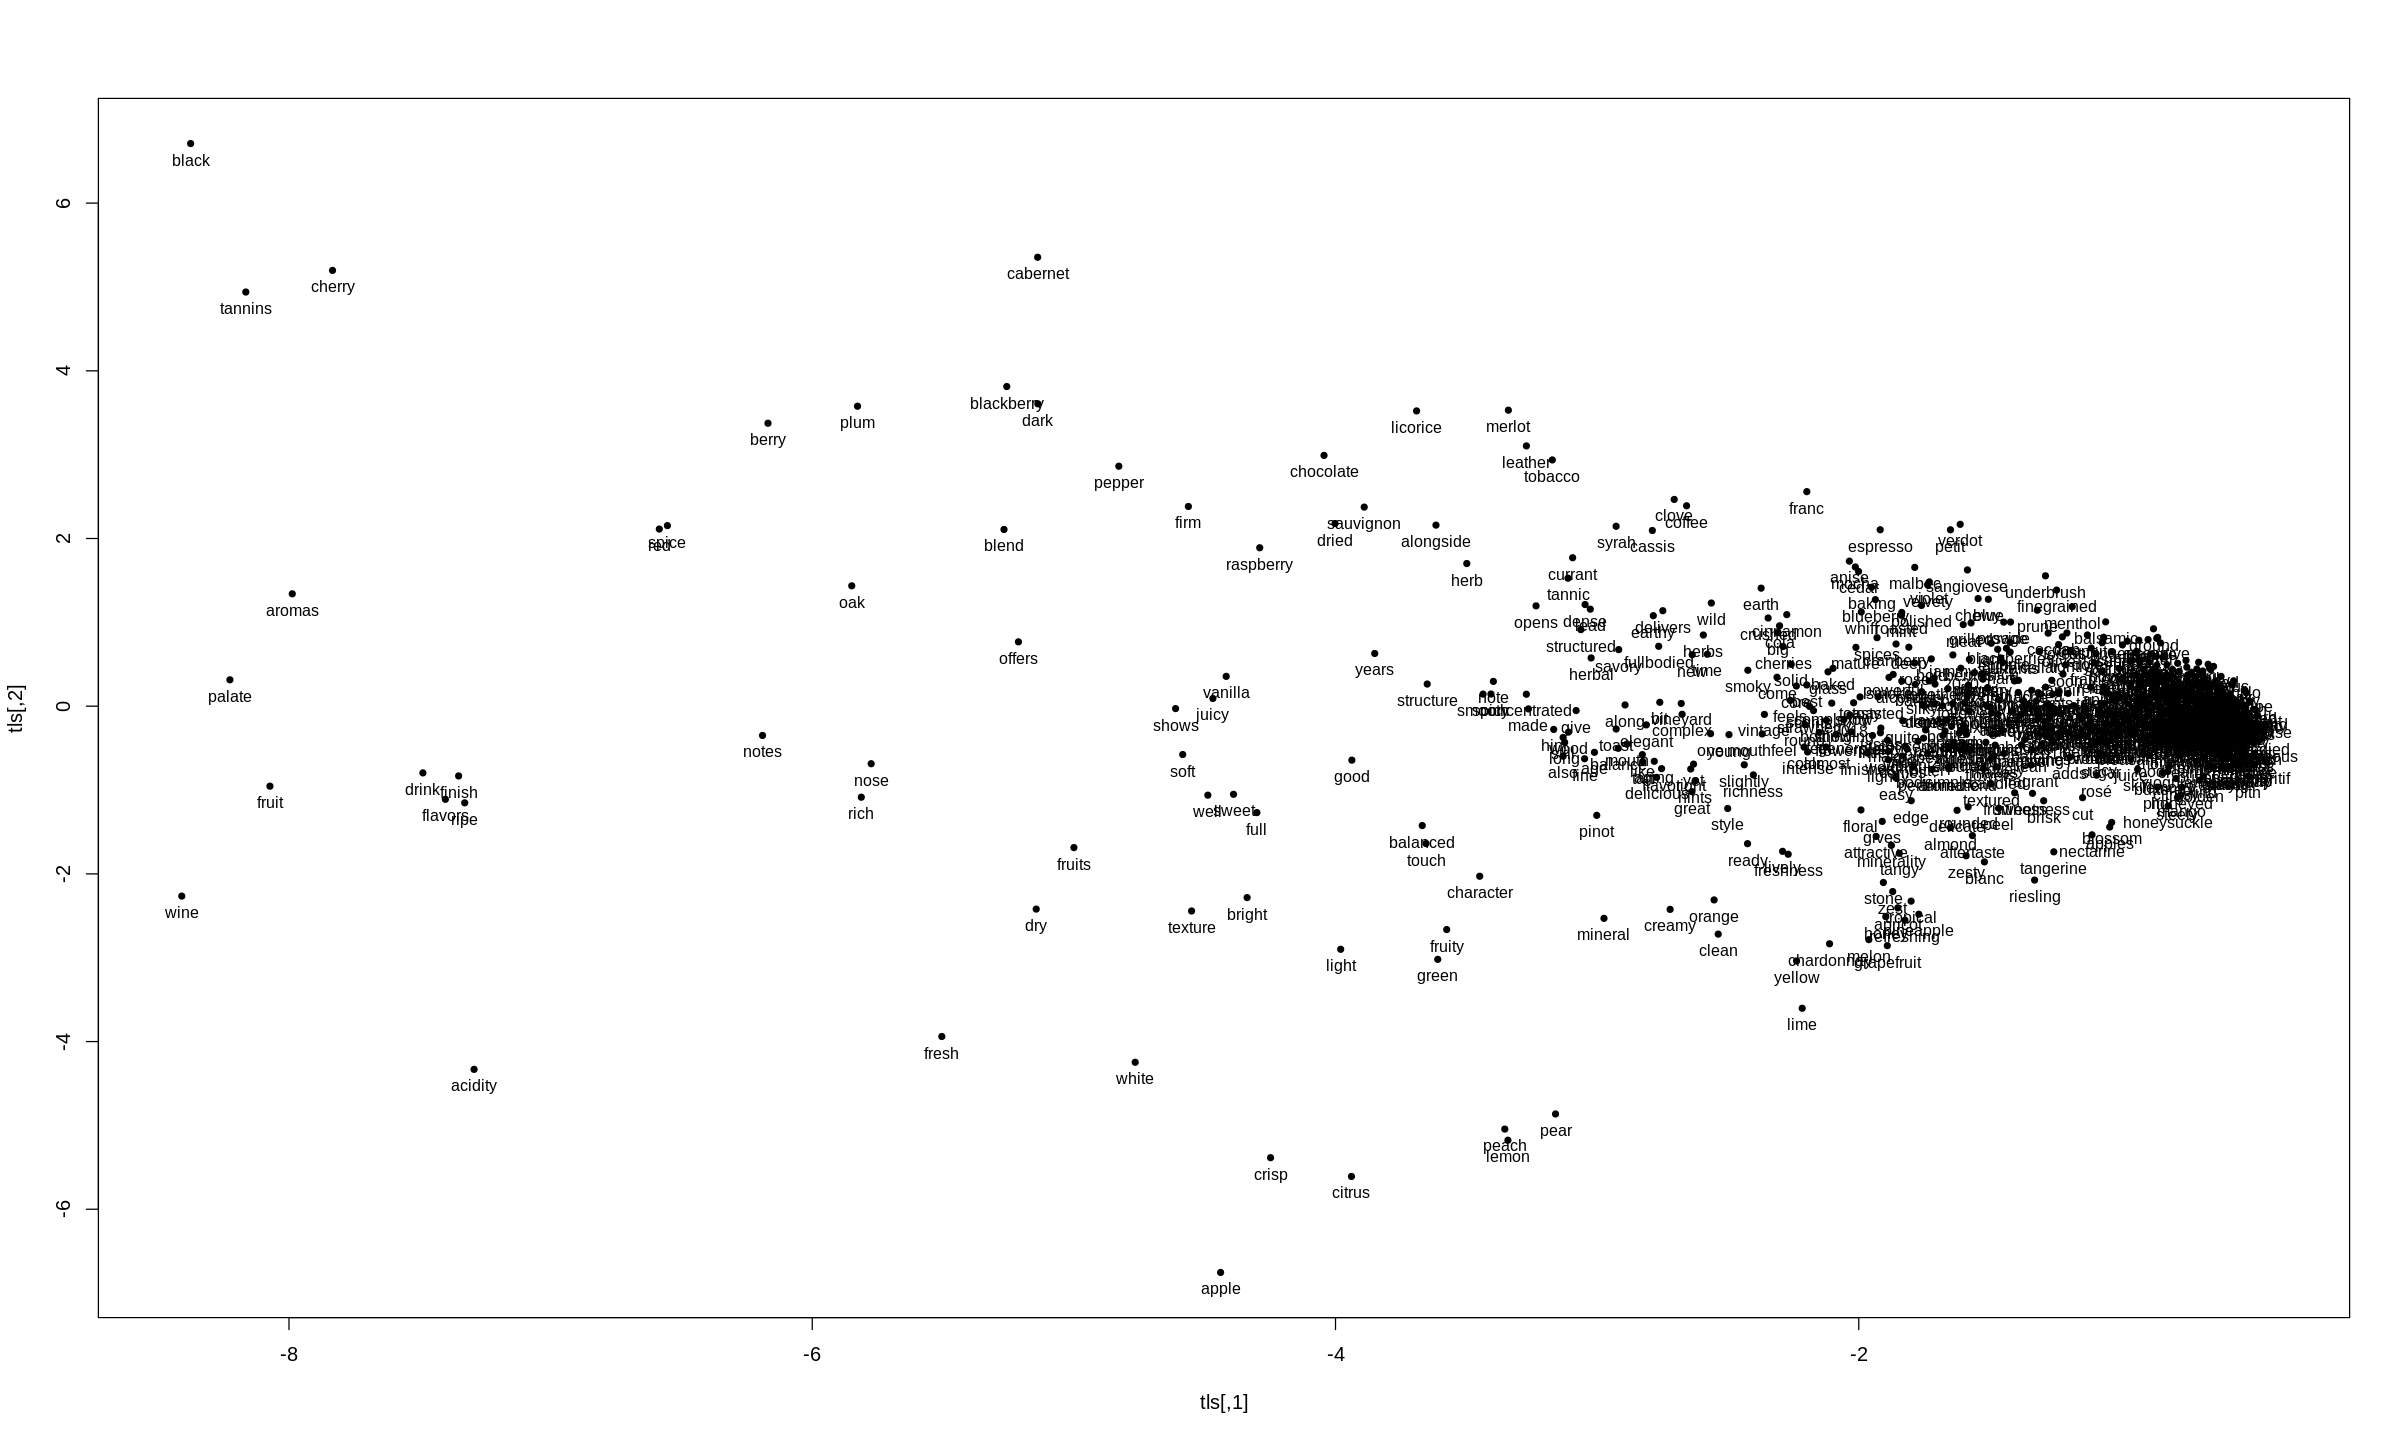

In [39]:
options(repr.plot.width=20, repr.plot.height=12)
plot(tls, pch=20)
text(tls,labels=words, cex=0.8, pos=1)
points(0,0,pch=20,cex=3,col="red")

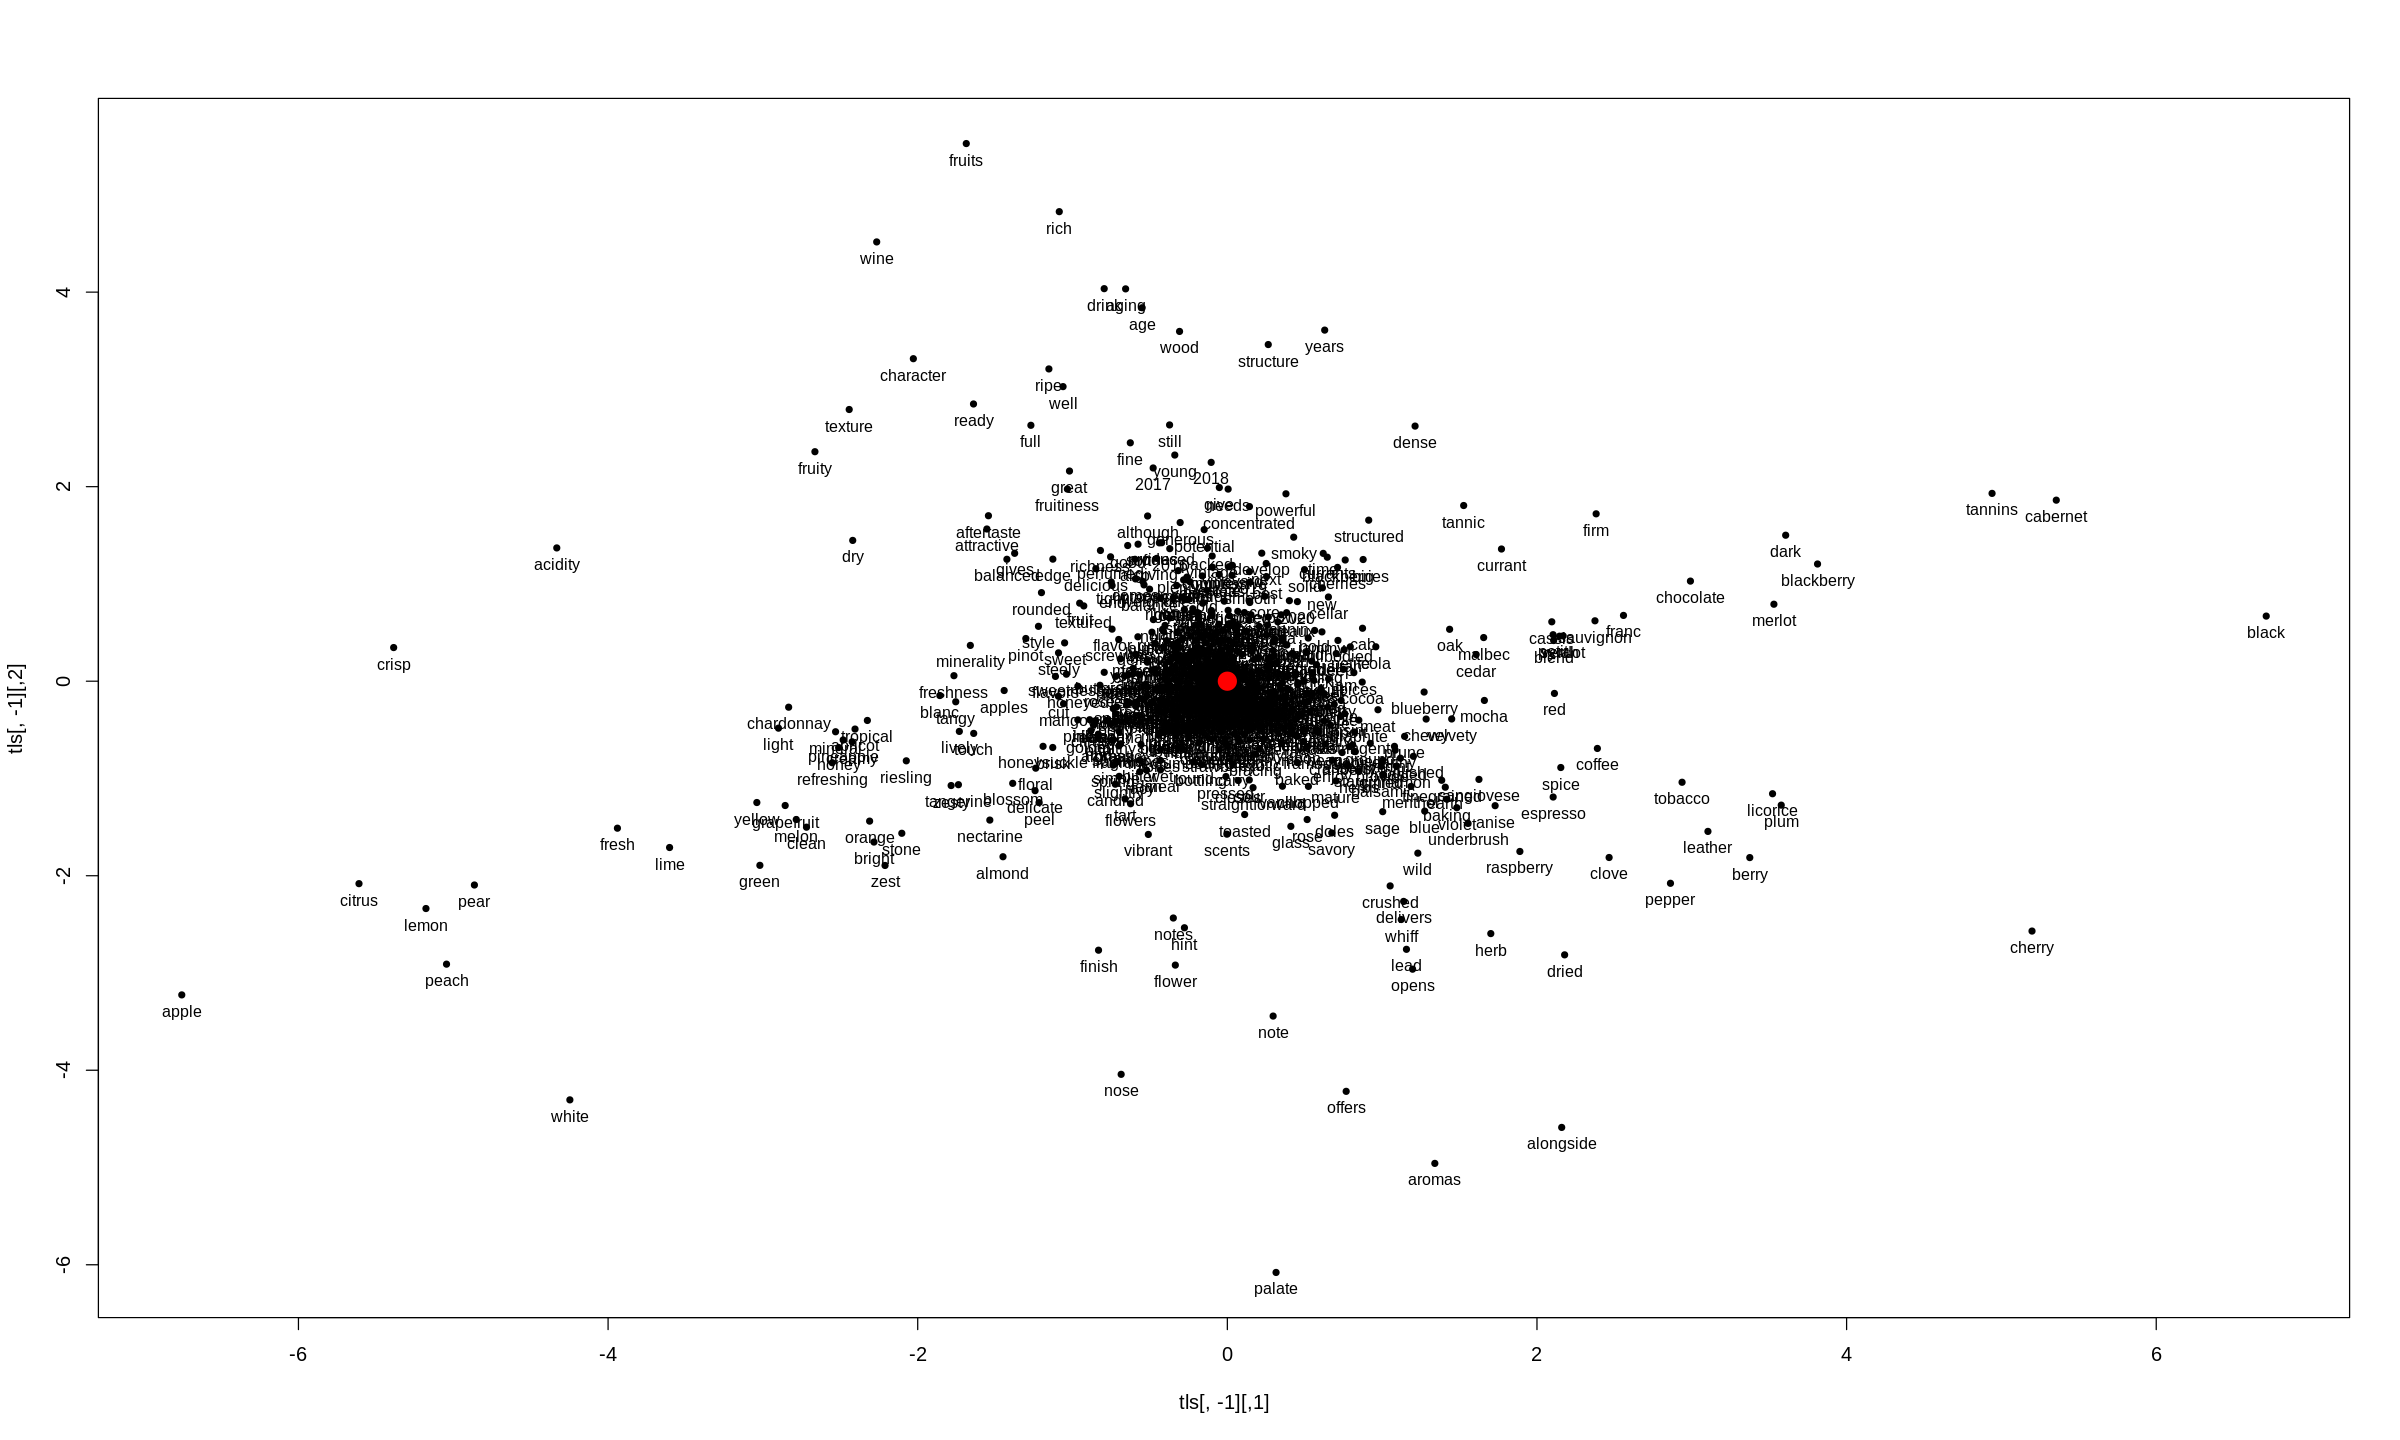

In [40]:
plot(tls[,-1], pch=20)
text(tls[,-1],labels=words, cex=0.8, pos=1)
points(0,0,pch=20,cex=3,col="red")

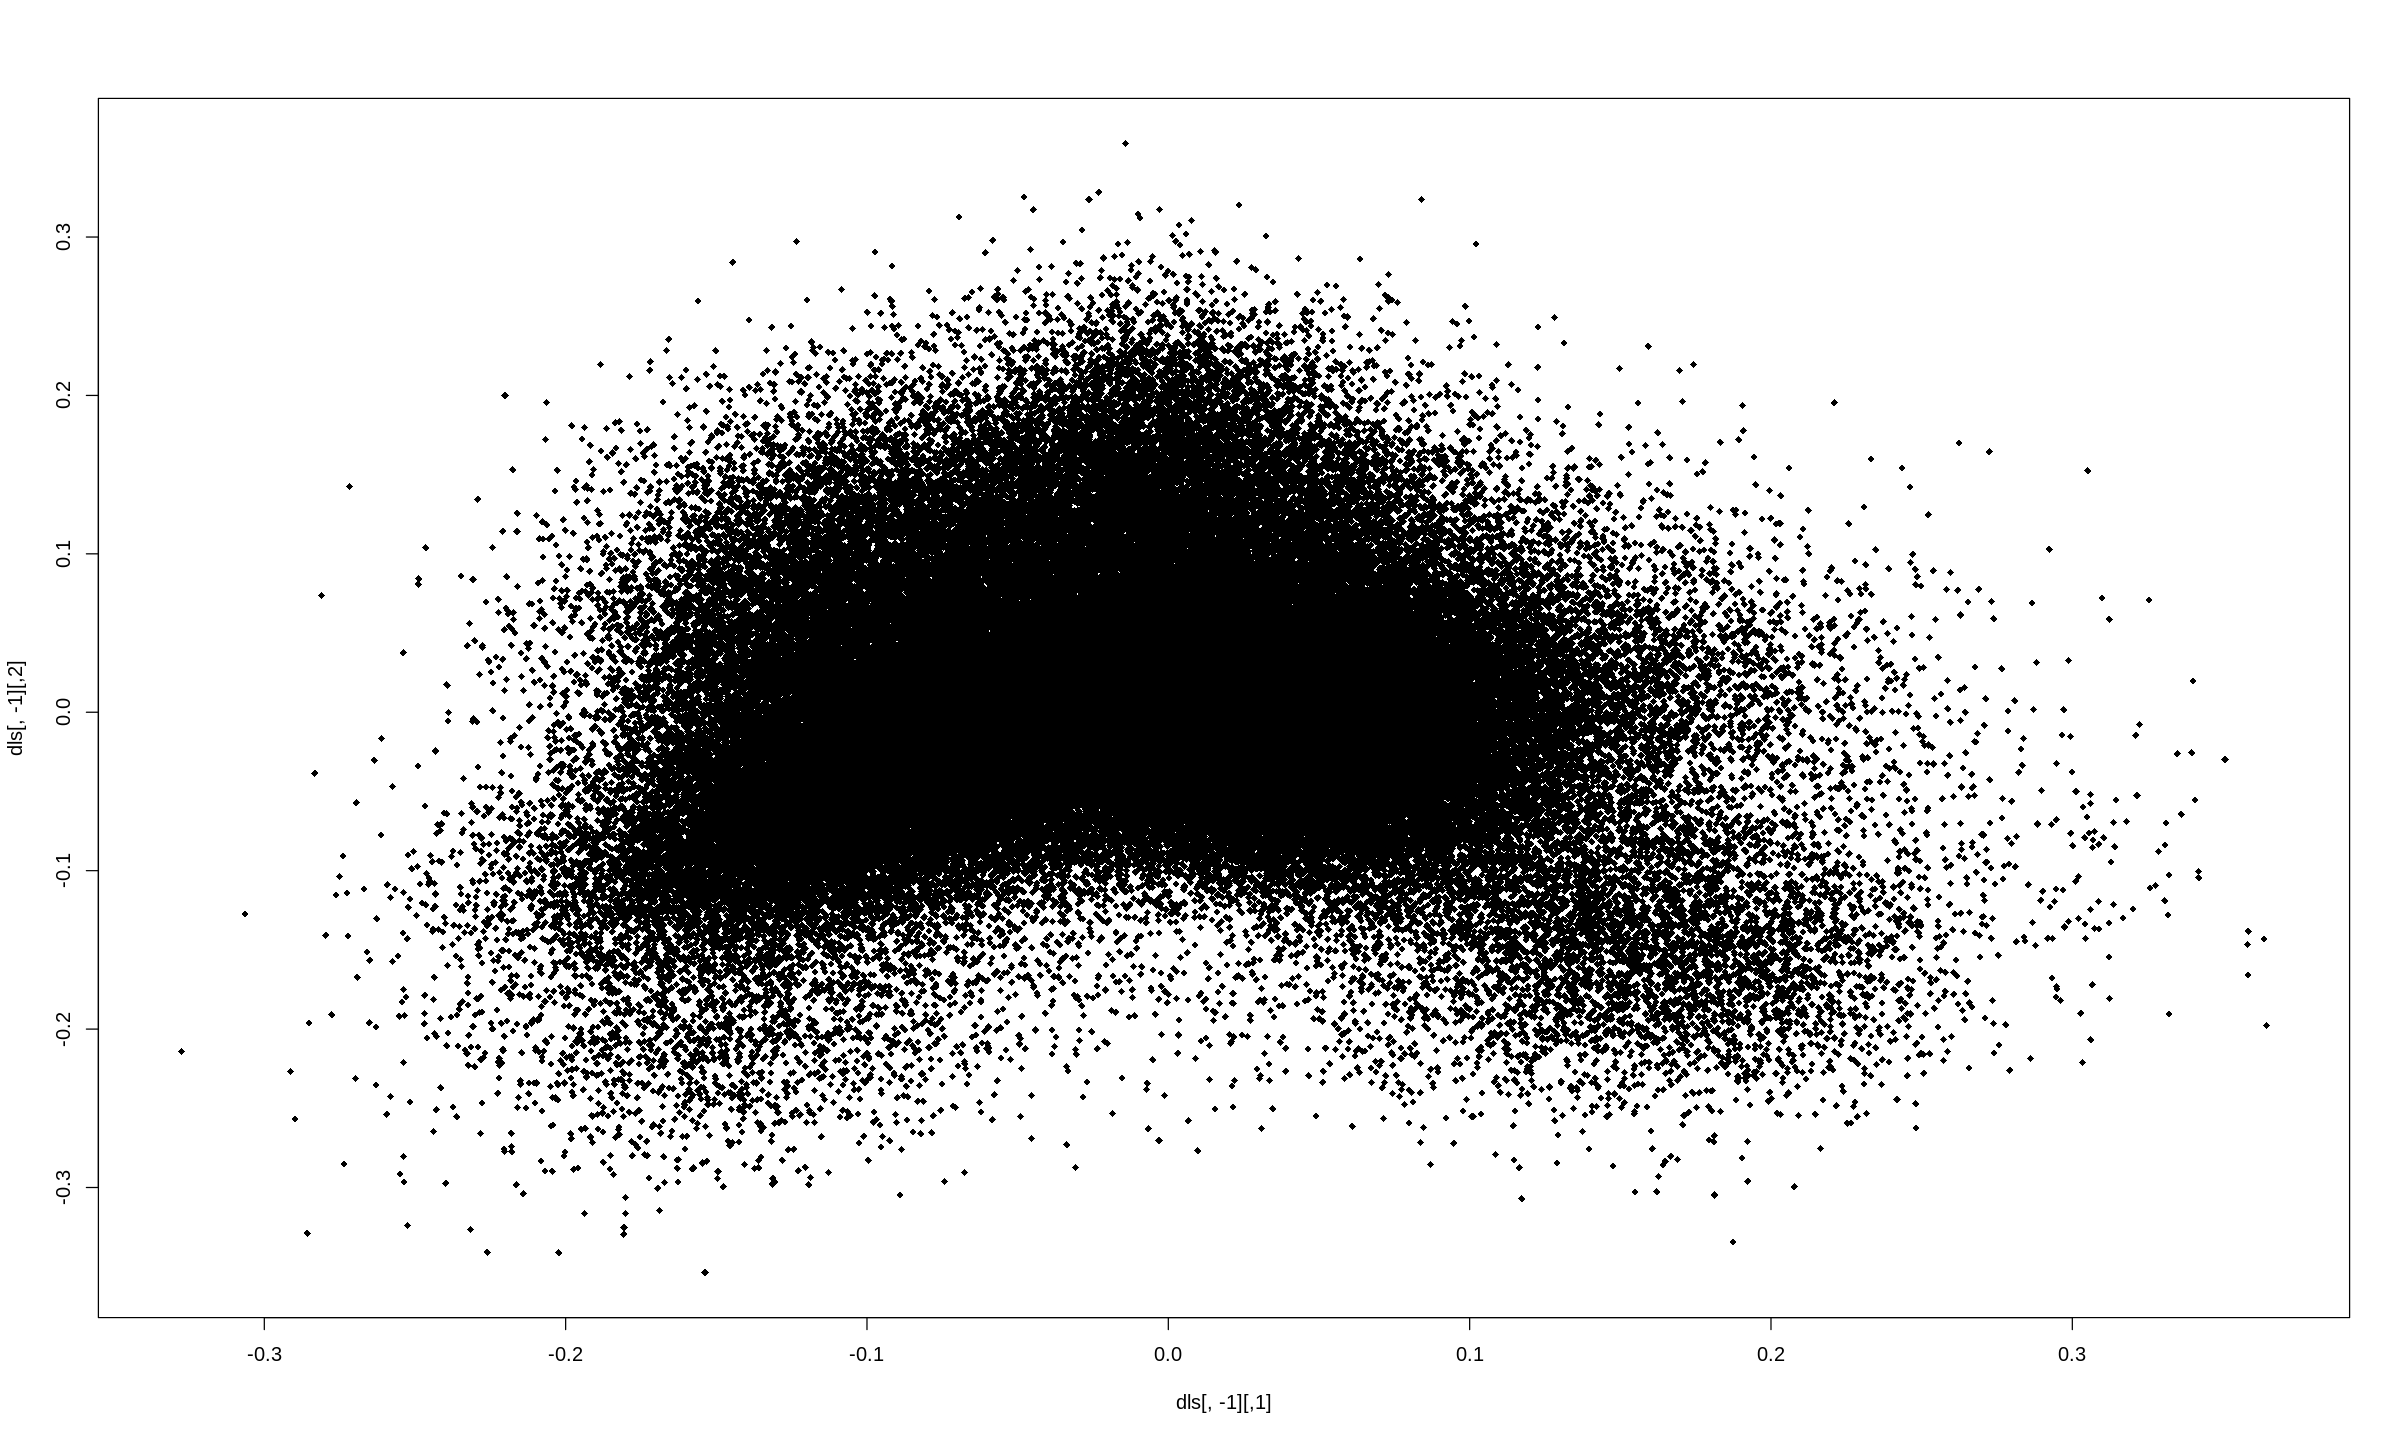

In [41]:
plot( dls[,-1], pch=18, cex=0.8 )

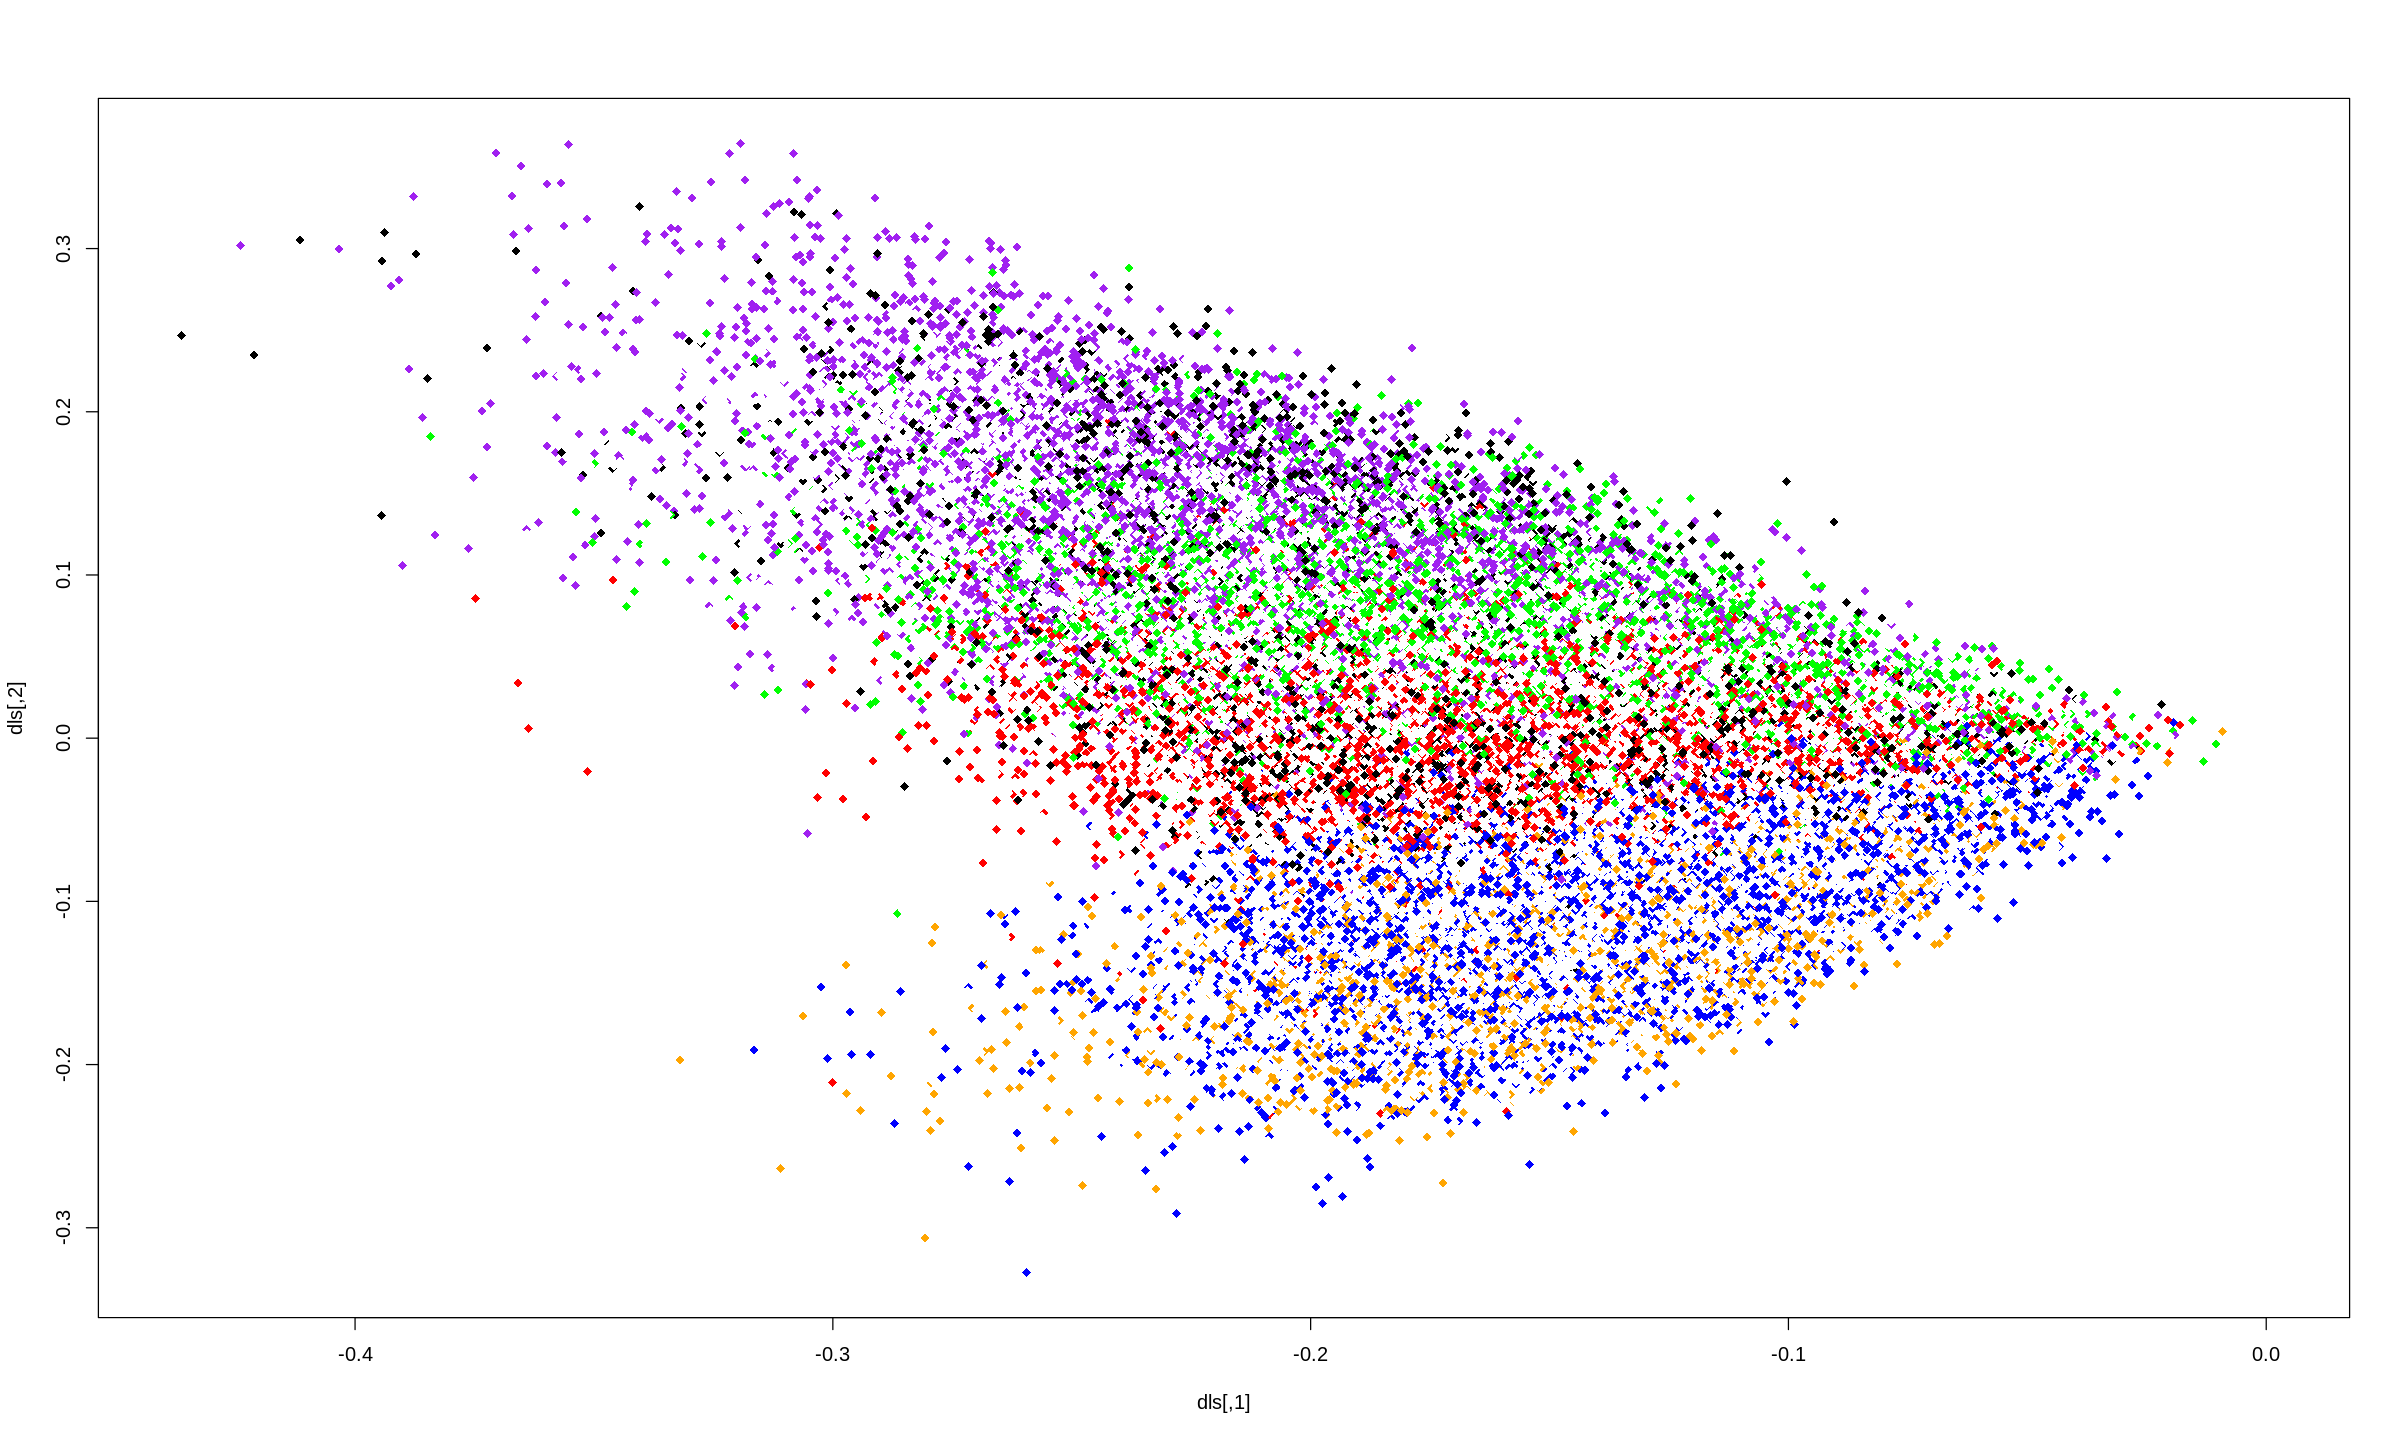

In [42]:
varietycolor <- function(x) switch(x, "Pinot Noir" = "red", "Chardonnay"="blue", "Cabernet Sauvignon"="green", "Red Blend"="purple", "Bordeaux-style Red Blend"="black","Riesling" = "orange", "white")
damcols <- sapply(variety, varietycolor)
plot( dls, pch=18, cex=1, col=damcols )

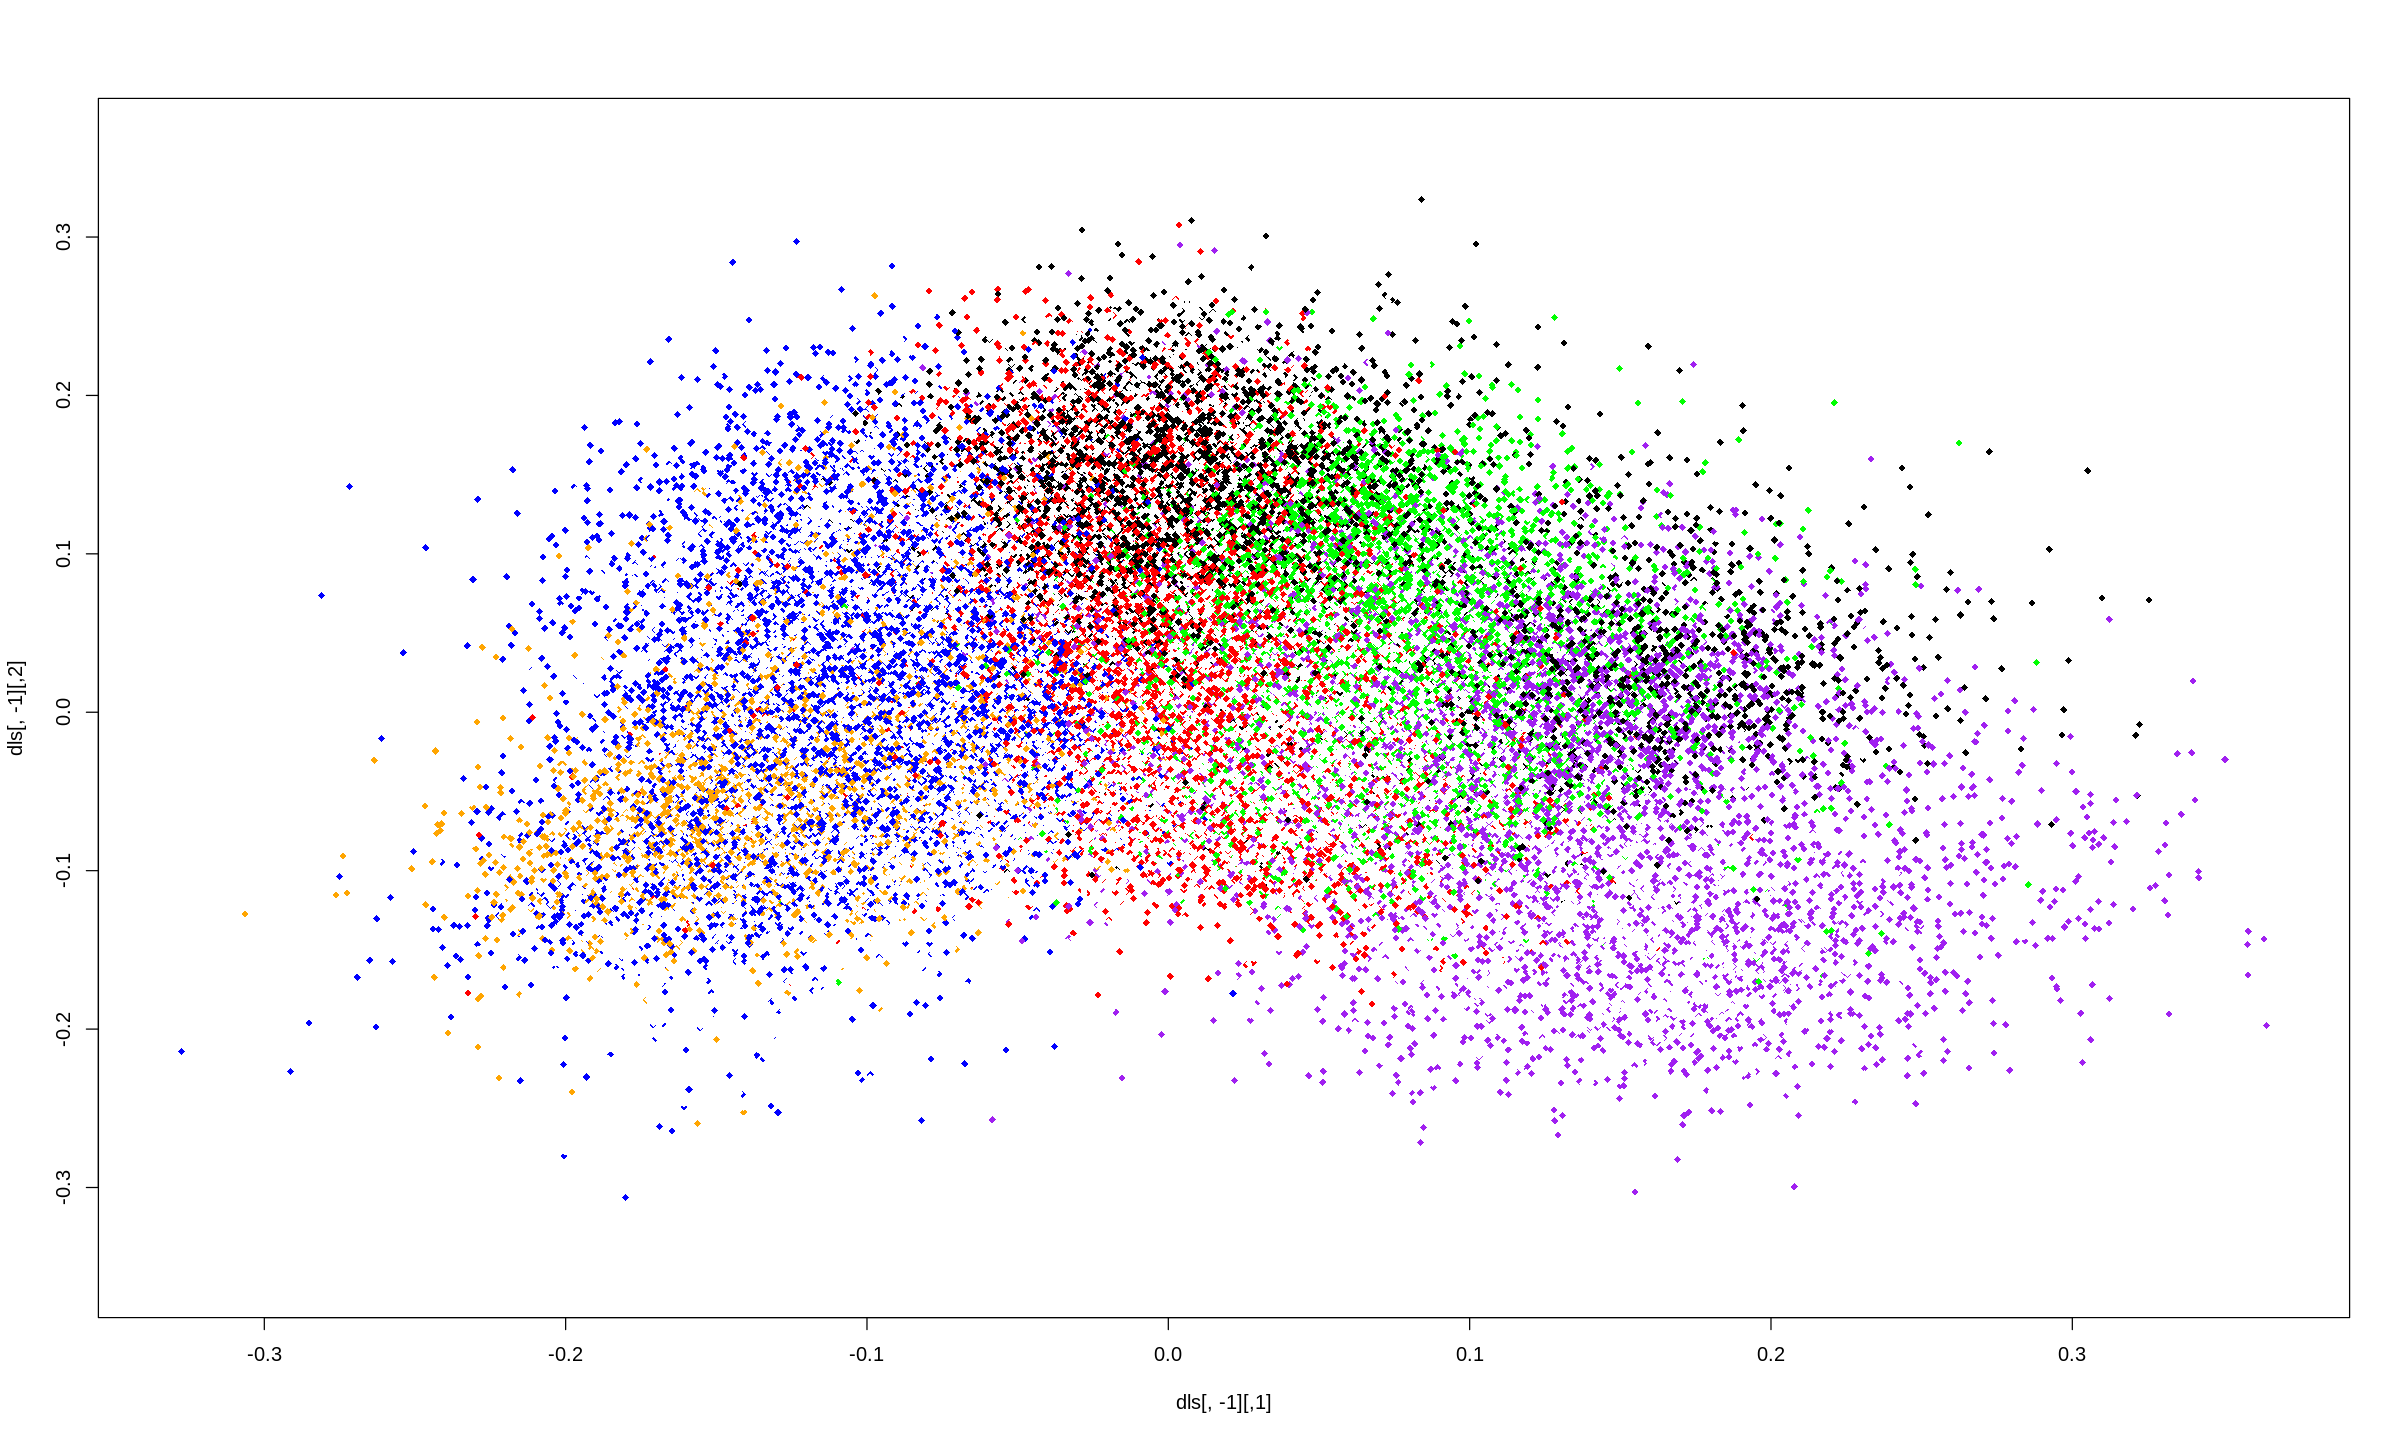

In [43]:
plot( dls[,-1], pch=18, cex=0.8, col=damcols )

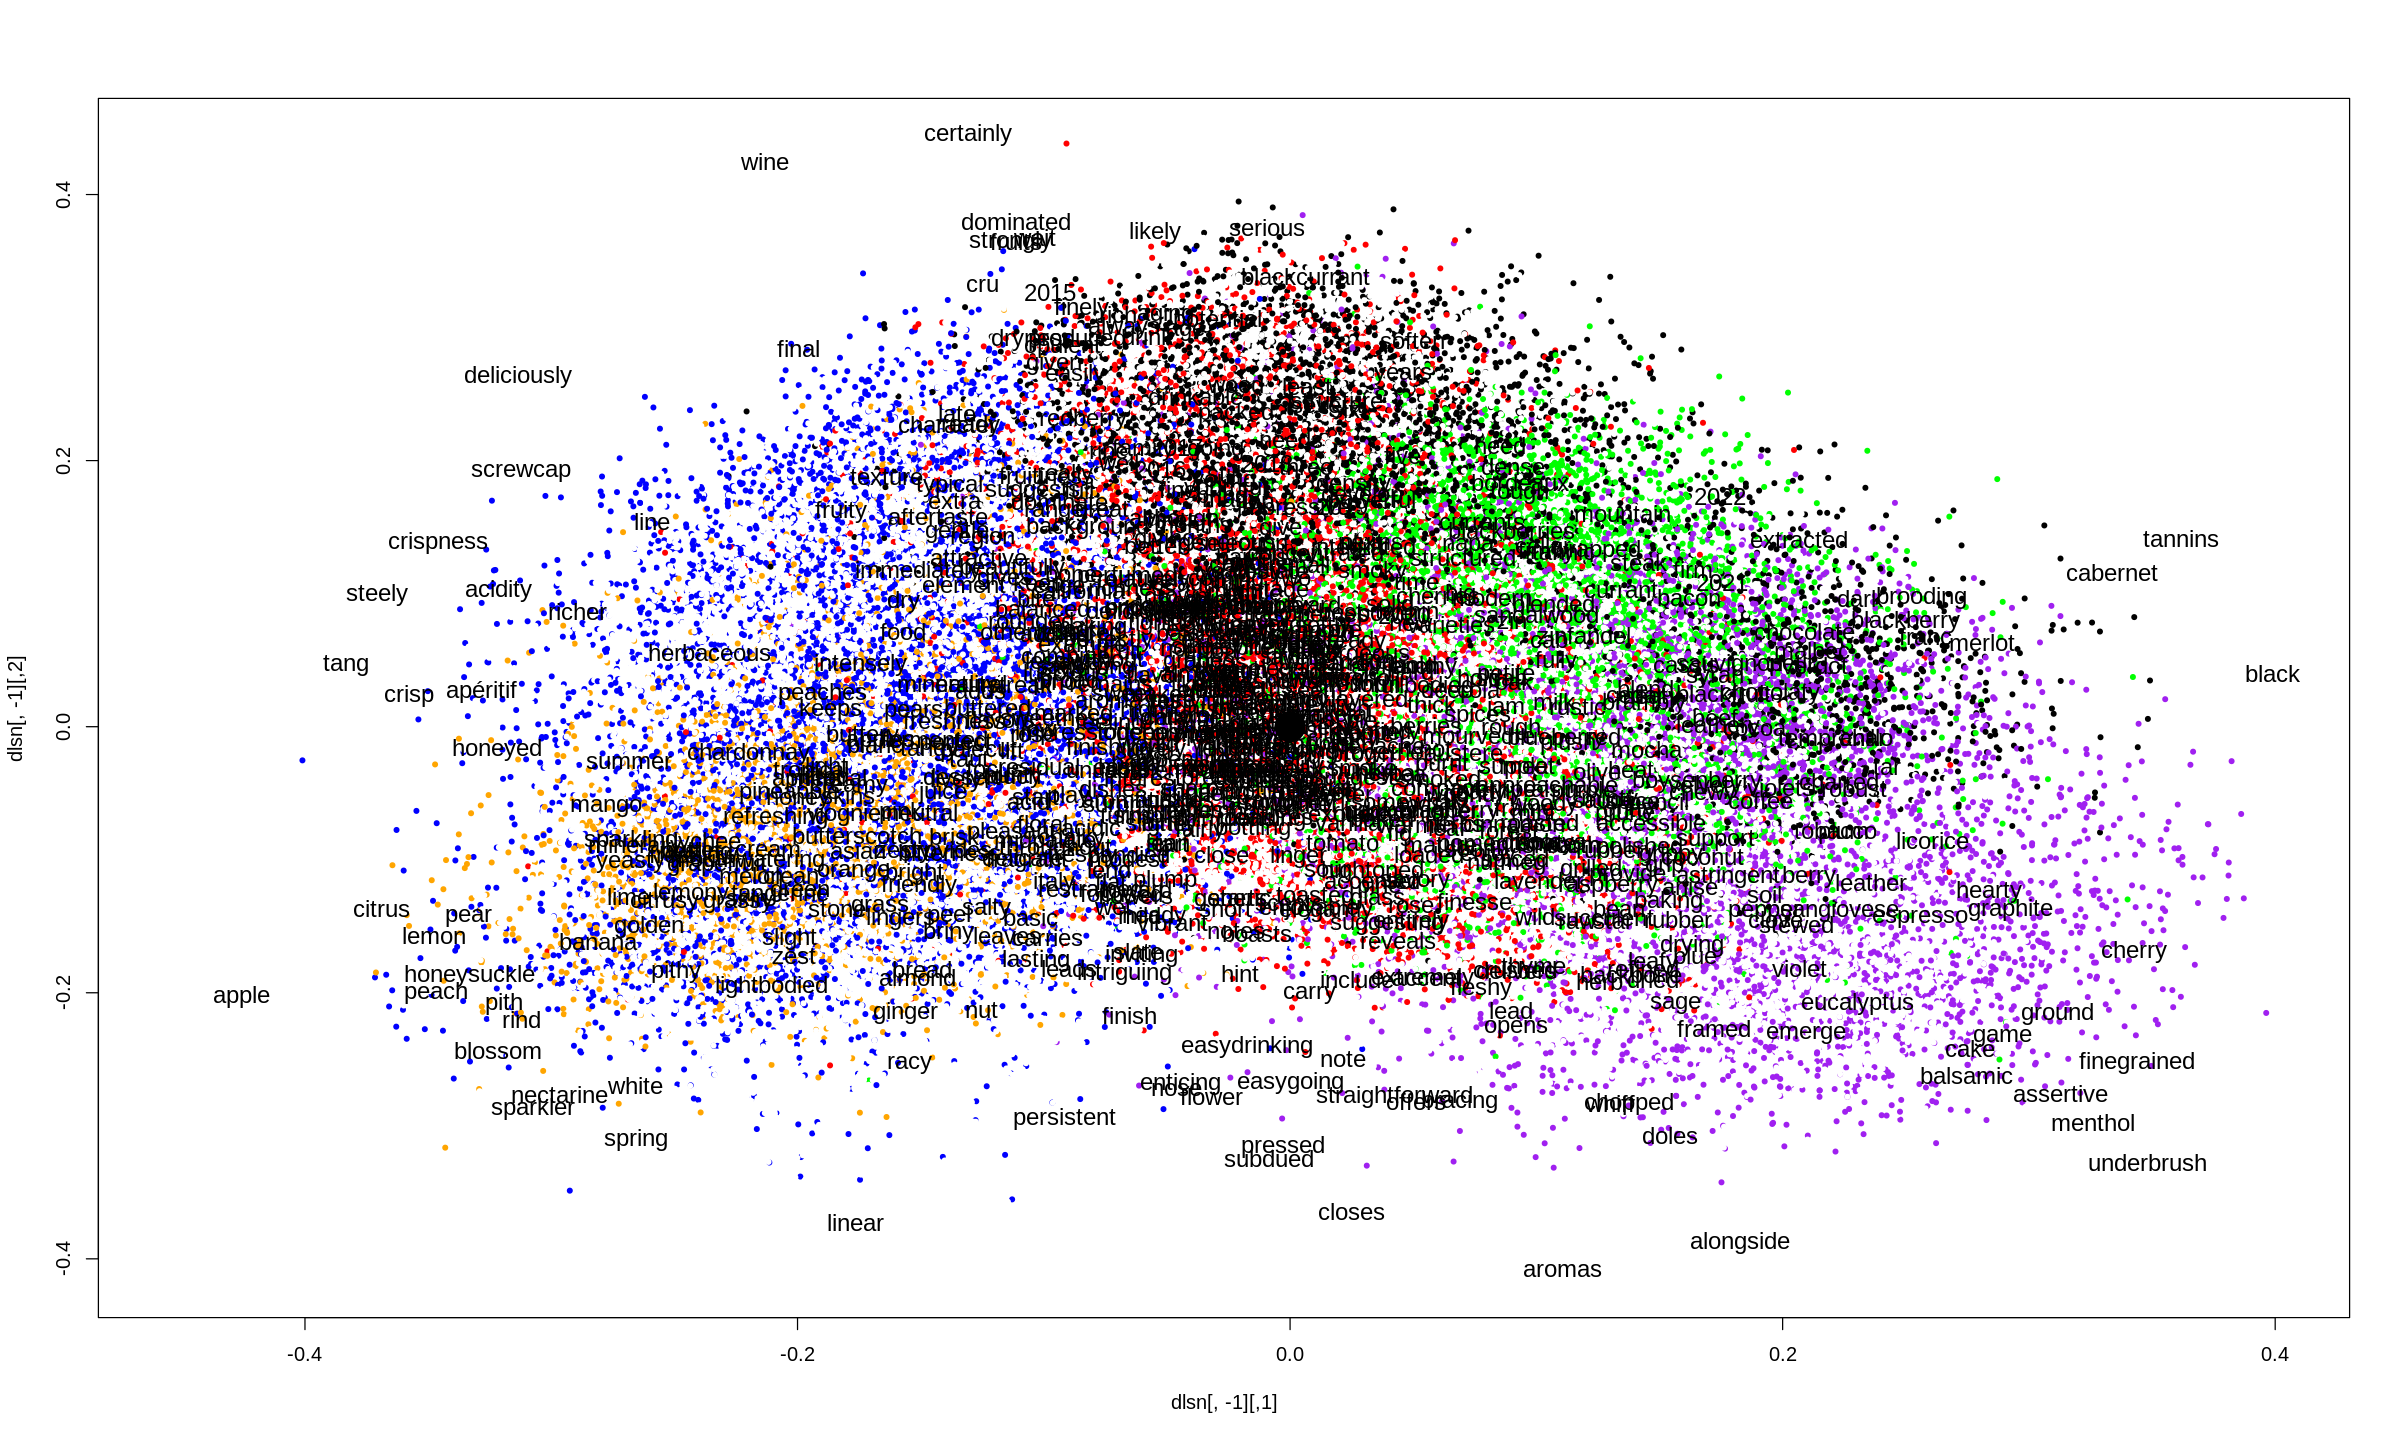

In [44]:
normrows <- function(x) x / apply(x,1,norm,"2")
tlsn <- normrows(tls)
dlsn <- normrows(dls)
plot( dlsn[,-1], pch=20, cex=0.8, col=damcols )
text( tlsn[,-1], labels=words, cex=1.2 )
points( 0, 0, pch=20, cex=5 )

In [45]:
menthol.vs.redBlend <- table( tdm["menthol",]>0, variety=="Red Blend")
dimnames(menthol.vs.redBlend) <- list(menthol = c("No", "Si"), redBlend = c("No", "Si"))
chisqtest = chisq.test( menthol.vs.redBlend, correct=FALSE )
chisqtest


	Pearson's Chi-squared test

data:  menthol.vs.redBlend
X-squared = 166.67, df = 1, p-value < 2.2e-16


In [46]:
chisqtest$expected
chisqtest$observed

redBlend
menthol No         Si        
     No 110710.179 8164.82118
     Si   1005.821   74.17882

       redBlend
menthol     No     Si
     No 110817   8058
     Si    899    181

In [47]:
norm_vec <- function(x) sqrt(sum(x^2))
norma_termini_lsa <- apply(tls, 1, norm_vec)

In [48]:
neighborMenth = names (associate(tls[,2:3], "menthol", threshold=0.999))

In [49]:
norma_termini_lsa[neighborMenth]

eucalyptus     rubber  raspberry underbrush  assertive    grilled     violet 
  1.892576   1.607752  14.640555   4.466926   2.622165   8.120429   7.159701 
     offer     forest       cake     herbal   balsamic   displays   mushroom 
  1.524111   9.288947   2.142182  14.582968   3.662700   1.291861   2.187434 
    baking      floor  cranberry 
  9.228045   7.833771  11.494411

In [50]:
grilled.vs.redBlend <- table( tdm["grilled",]>0, variety=="Red Blend")
dimnames(grilled.vs.redBlend) <- list(grilled = c("No", "Si"), redBlend = c("No", "Si"))
chisqtest = chisq.test( grilled.vs.redBlend, correct=FALSE )
chisqtest


	Pearson's Chi-squared test

data:  grilled.vs.redBlend
X-squared = 276.08, df = 1, p-value < 2.2e-16


In [51]:
chisqtest$expected
chisqtest$observed

redBlend
grilled No         Si      
     No 109988.409 8111.591
     Si   1727.591  127.409

       redBlend
grilled     No     Si
     No 110168   7932
     Si   1548    307

In [52]:
grilledMen.vs.redBlend <- table( tdm["grilled",]>0 & tdm["menthol",]>0, variety=="Red Blend")
dimnames(grilledMen.vs.redBlend) <- list(grilledMen = c("No", "Si"), redBlend = c("No", "Si"))
chisqtest = chisq.test( grilledMen.vs.redBlend, correct=FALSE )
chisqtest


	Pearson's Chi-squared test

data:  grilledMen.vs.redBlend
X-squared = 38.538, df = 1, p-value = 5.369e-10


In [53]:
chisqtest$expected
chisqtest$observed

redBlend
grilledMen No           Si         
        No 111638.70078 8233.299221
        Si     77.29922    5.700779

          redBlend
grilledMen     No     Si
        No 111653   8219
        Si     63     20

In [54]:
grilledMenth.Query <- "grilled menthol"
grilledMenth.Vector <- query( grilledMenth.Query, words )
grilledMenth.VWeight <- lw_logtf(grilledMenth.Vector) * ( 1-entropy(tdm) )
grilledMenth.LSA <- t(grilledMenth.VWeight) %*% lsar$tk
grilledMenth.LSA

[,1]        [,2]       [,3]        [,4]        [,5]        
GRILLED MENTHOL -0.01260412 0.01868192 -0.01776892 -0.02204844 0.0005129582
                [,6]        [,7]         [,8]        [,9]         [,10]      
GRILLED MENTHOL 0.009597498 -0.003057419 0.004351274 -0.007012513 0.003196456
                [,11] [,12]      [,13]       [,14]       [,15]      
GRILLED MENTHOL ⋯     0.01925918 -0.01123987 0.006176271 -0.01122888
                [,16]       [,17]      [,18]       [,19]       [,20]      
GRILLED MENTHOL 0.007268836 0.01304184 -0.02246932 -0.03349468 -0.01210765
                [,21]    
GRILLED MENTHOL 0.0161421

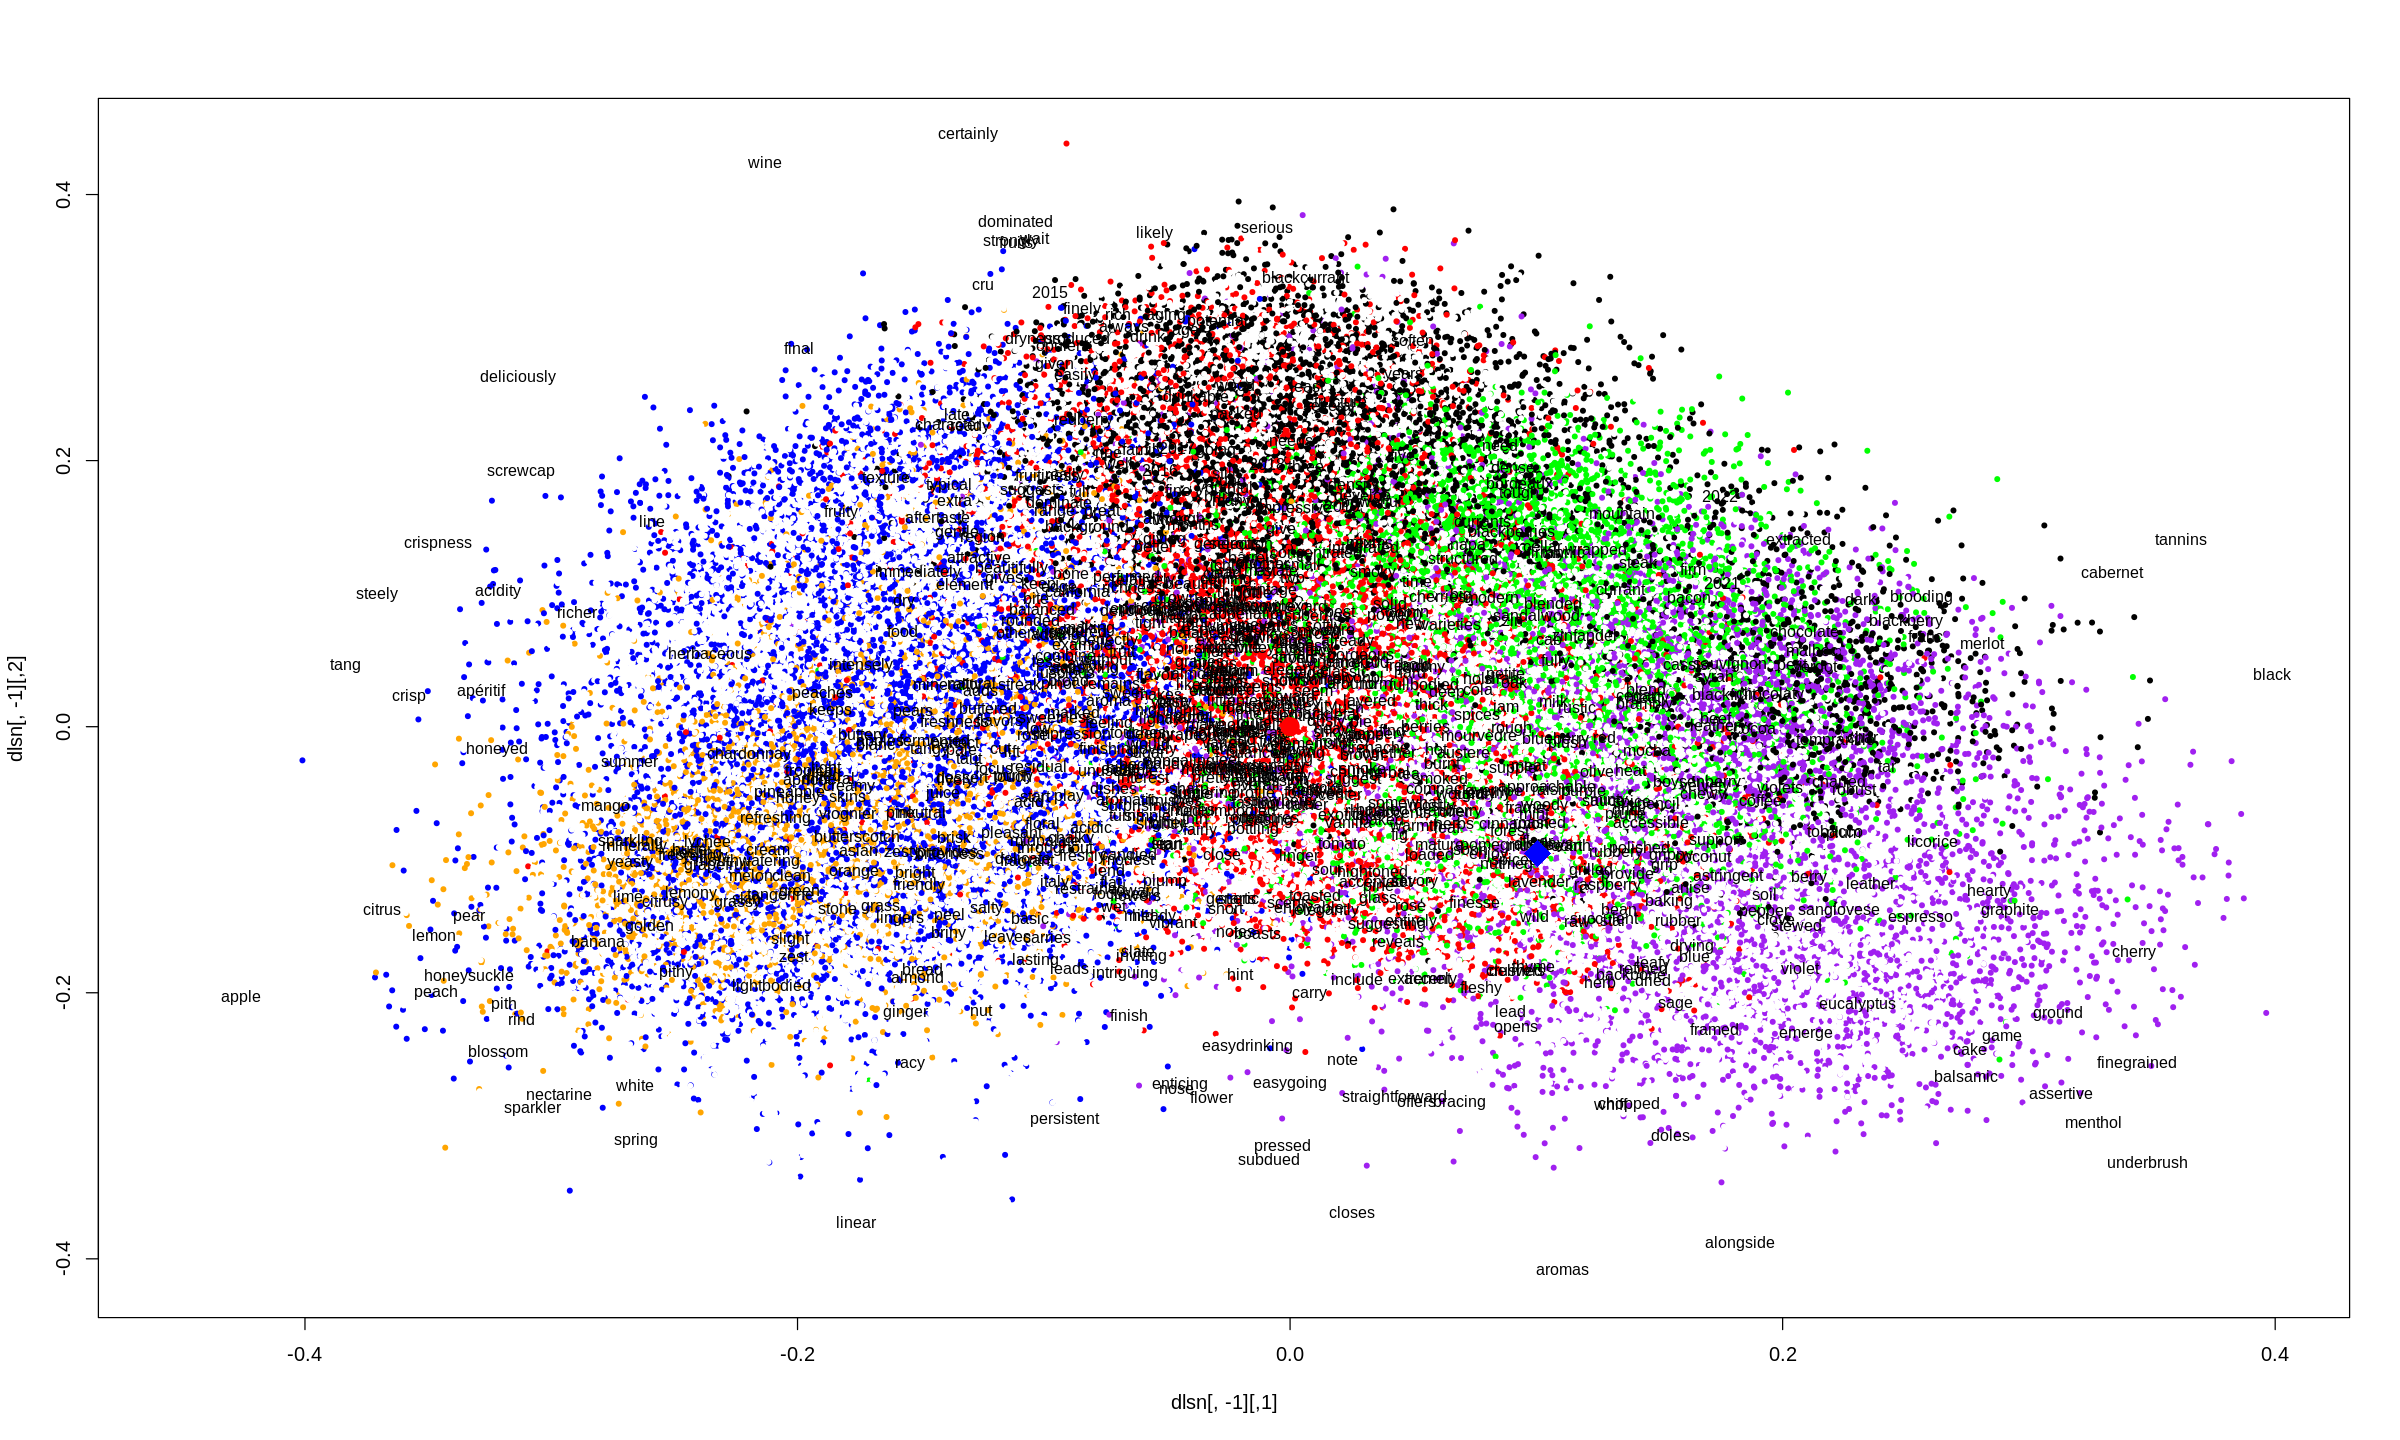

In [55]:
plot( dlsn[,-1], pch=20, cex=0.8, col=damcols )
text( tlsn[,-1], labels=words, cex=0.8 )
points( 0, 0, pch=20, cex=3,col="red" ) 
grilledMenth.LSANorm <- normrows( grilledMenth.LSA )
points(grilledMenth.LSANorm[2], grilledMenth.LSANorm[3],cex=3,pch=18,col="blue")

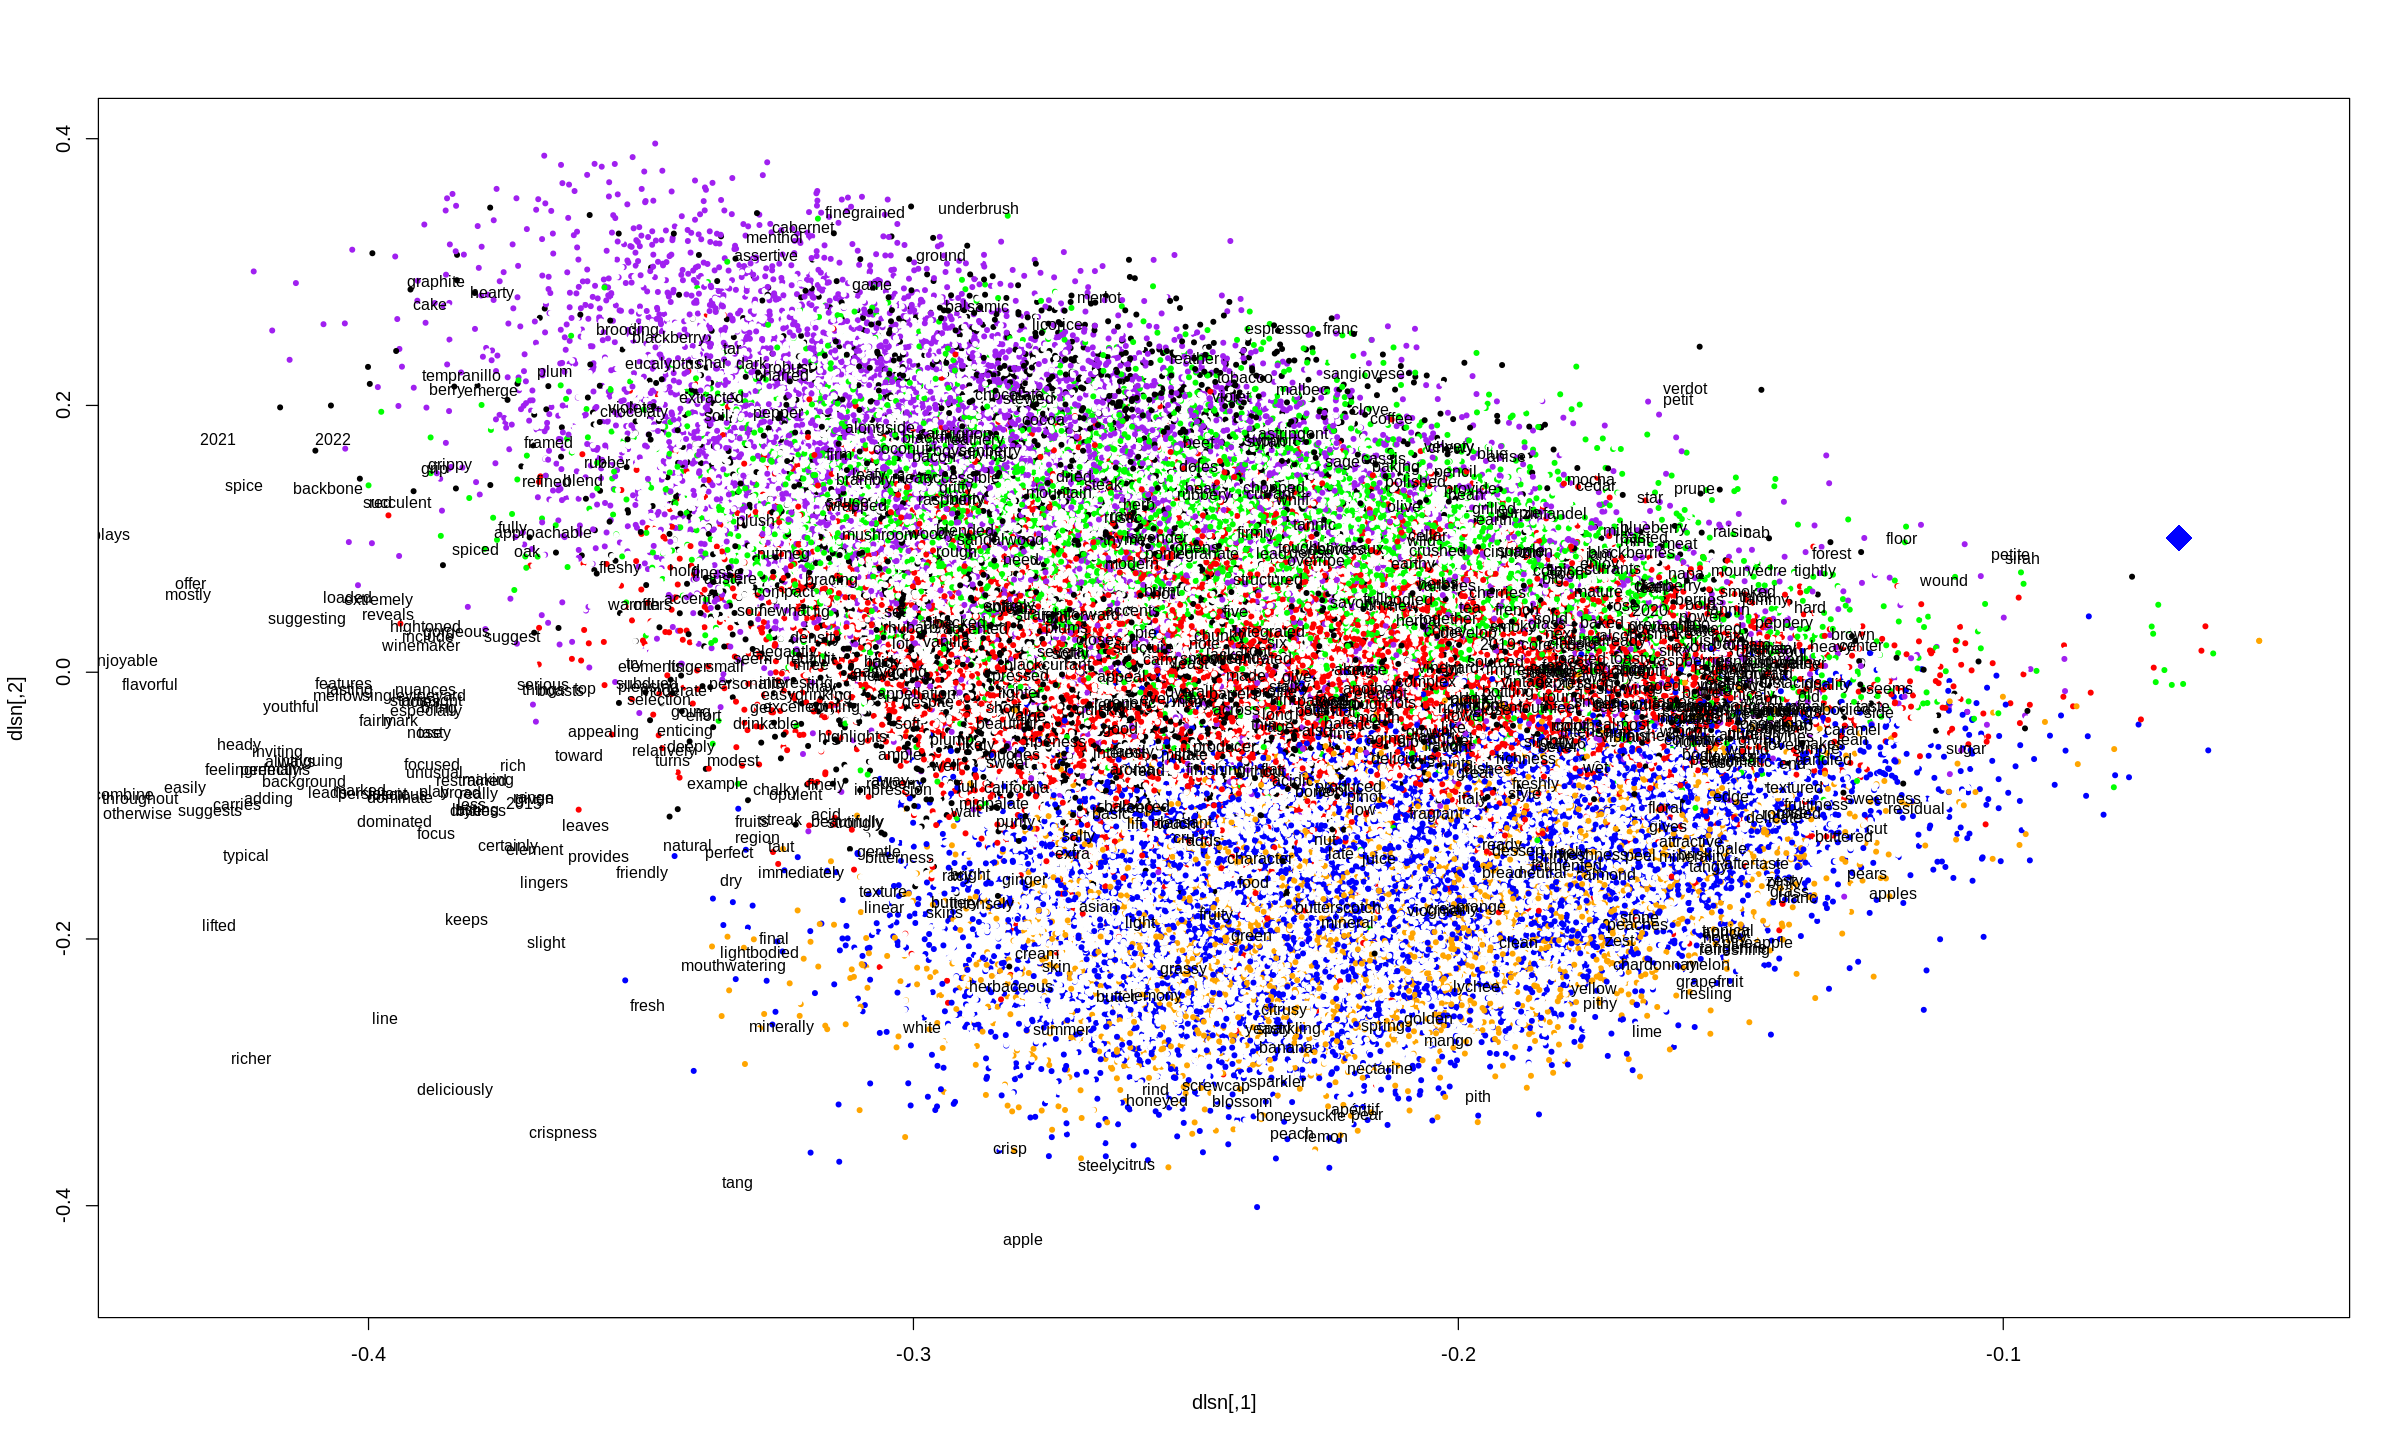

In [56]:
plot( dlsn, pch=20, cex=0.8, col=damcols )
text( tlsn, labels=words, cex=0.8 )
points( 0, 0, pch=20, cex=3 )
points(grilledMenth.LSANorm,cex=3,pch=18,col="blue")

In [57]:
cosines <- function(X, Q) apply( X, 1, cosine, as.vector(Q) )
top <- function(X, N) order( X, decreasing=TRUE )[1:N]

In [58]:
top( cosines( dls[,2:3], grilledMenth.LSA[2:3] ), 10 )
# elenco dei 10 documenti sopra menzionati 
variety[top( cosines( dls[,2:3], grilledMenth.LSA[2:3] ), 10 )]
reviews[top(cosines(dls[,2:3], grilledMenth.LSA[2:3]), 10)]

[1]  28567  74477  30148  55455  54243  46978  93041  84669  22388 112514

[1] "Pinot Noir" "Barbera"    "Pinot Noir" "Sangiovese" "Sangiovese"
 [6] "Garnacha"   "Red Blend"  "Sangiovese" "Red Blend"  "Pinot Noir"

[1] "Leathery, dried cherry fruit flavors are set against streaks of earth, herb and a hint of barnyard. It's soft and eminently accessible, the tannins smooth and supple, with a hint of vanilla."                                                                                                                                       
 [2] "Enticing aromas of violet, dark berry, leather and sweet baking spices lead the way on this vibrant, delicious red. The lively, polished palate doles out juicy wild cherry, black raspberry, cinnamon and clove framed in bright acidity and supple tannins. It boasts elegance and balance."                                        
 [3] "Not a lot of stuffing in this Pinot Noir. The raspberry and cherry flavors hit fast and disappear quickly, with a mushroomy finish. But the wine does show a certain flair and elegance."                                                                                                                                             
 [4] "Aromas of stewed plum, dried hay, toasted oak, espresso and game lead the nose. The palate delivers succulent wild cherry, fig, baking spice, tea leaf and pipe tobacco balanced by polished tannins. It's already accessible. Enjoy through 2019."                                                                                   
 [5] "Aromas of wild berry, leather, sunbaked earth, star anise and a balsamic note of menthol lift out of the glass. The robust, powerful palate offers fleshy blackberry, wild cherry, cinnamon, nutmeg and tobacco alongside chewy tannins. Despite the juicy fruit, there's a warmth of alcohol on the finish but it doesn't dominate." 
 [6] "Rusty in hue, with mature, slightly old aromas of leather, gym bag, dried leaves and mature berry. The palate has depth and concentration, while the flavors are herbal and run toward baked black cherry and tobacco. Caramel and mature fruit flavors vie for control of the roasted finish."                                       
 [7] "A blend of Corvina, Rondinella and Merlot, this has aromas reminiscent of black-skinned berry, wild cherry and white pepper. The supple, vibrant palate delivers black currant, clove and a touch of pomegranate alongside smooth tannins. Enjoy soon."                                                                               
 [8] "Leather, game, blue flowers and ripe, dark-skinned fruit aromas open this full-bodied wine made from the estate's highest vineyards. The palate offers dried black cherry, ground black pepper, clove, thyme and licorice alongside assertive, fine-grained tannins and fresh acidity. It closes on a graphite note. Drink 2018–2028."
 [9] "This appealing blend of 70% Montepulciano and 30% Sagrantino offers up aromas of bright fruits and meat juices. The savory palate delivers flavors of juicy plum, raspberry and licorice. It's round and ready, with polished tannins, so enjoy soon."                                                                                
[10] "This aggressive, spice-laden, clone-focused bottling from Norm Yost shows crushed kola nut, clove, black cherry, turned earth and touch of pine forest on the nose. Dried mint and eucalyptus flavors lead the sip, which settles into dark red fruits and heavier brown spice, with plenty of acidity and crushed rock minerality."

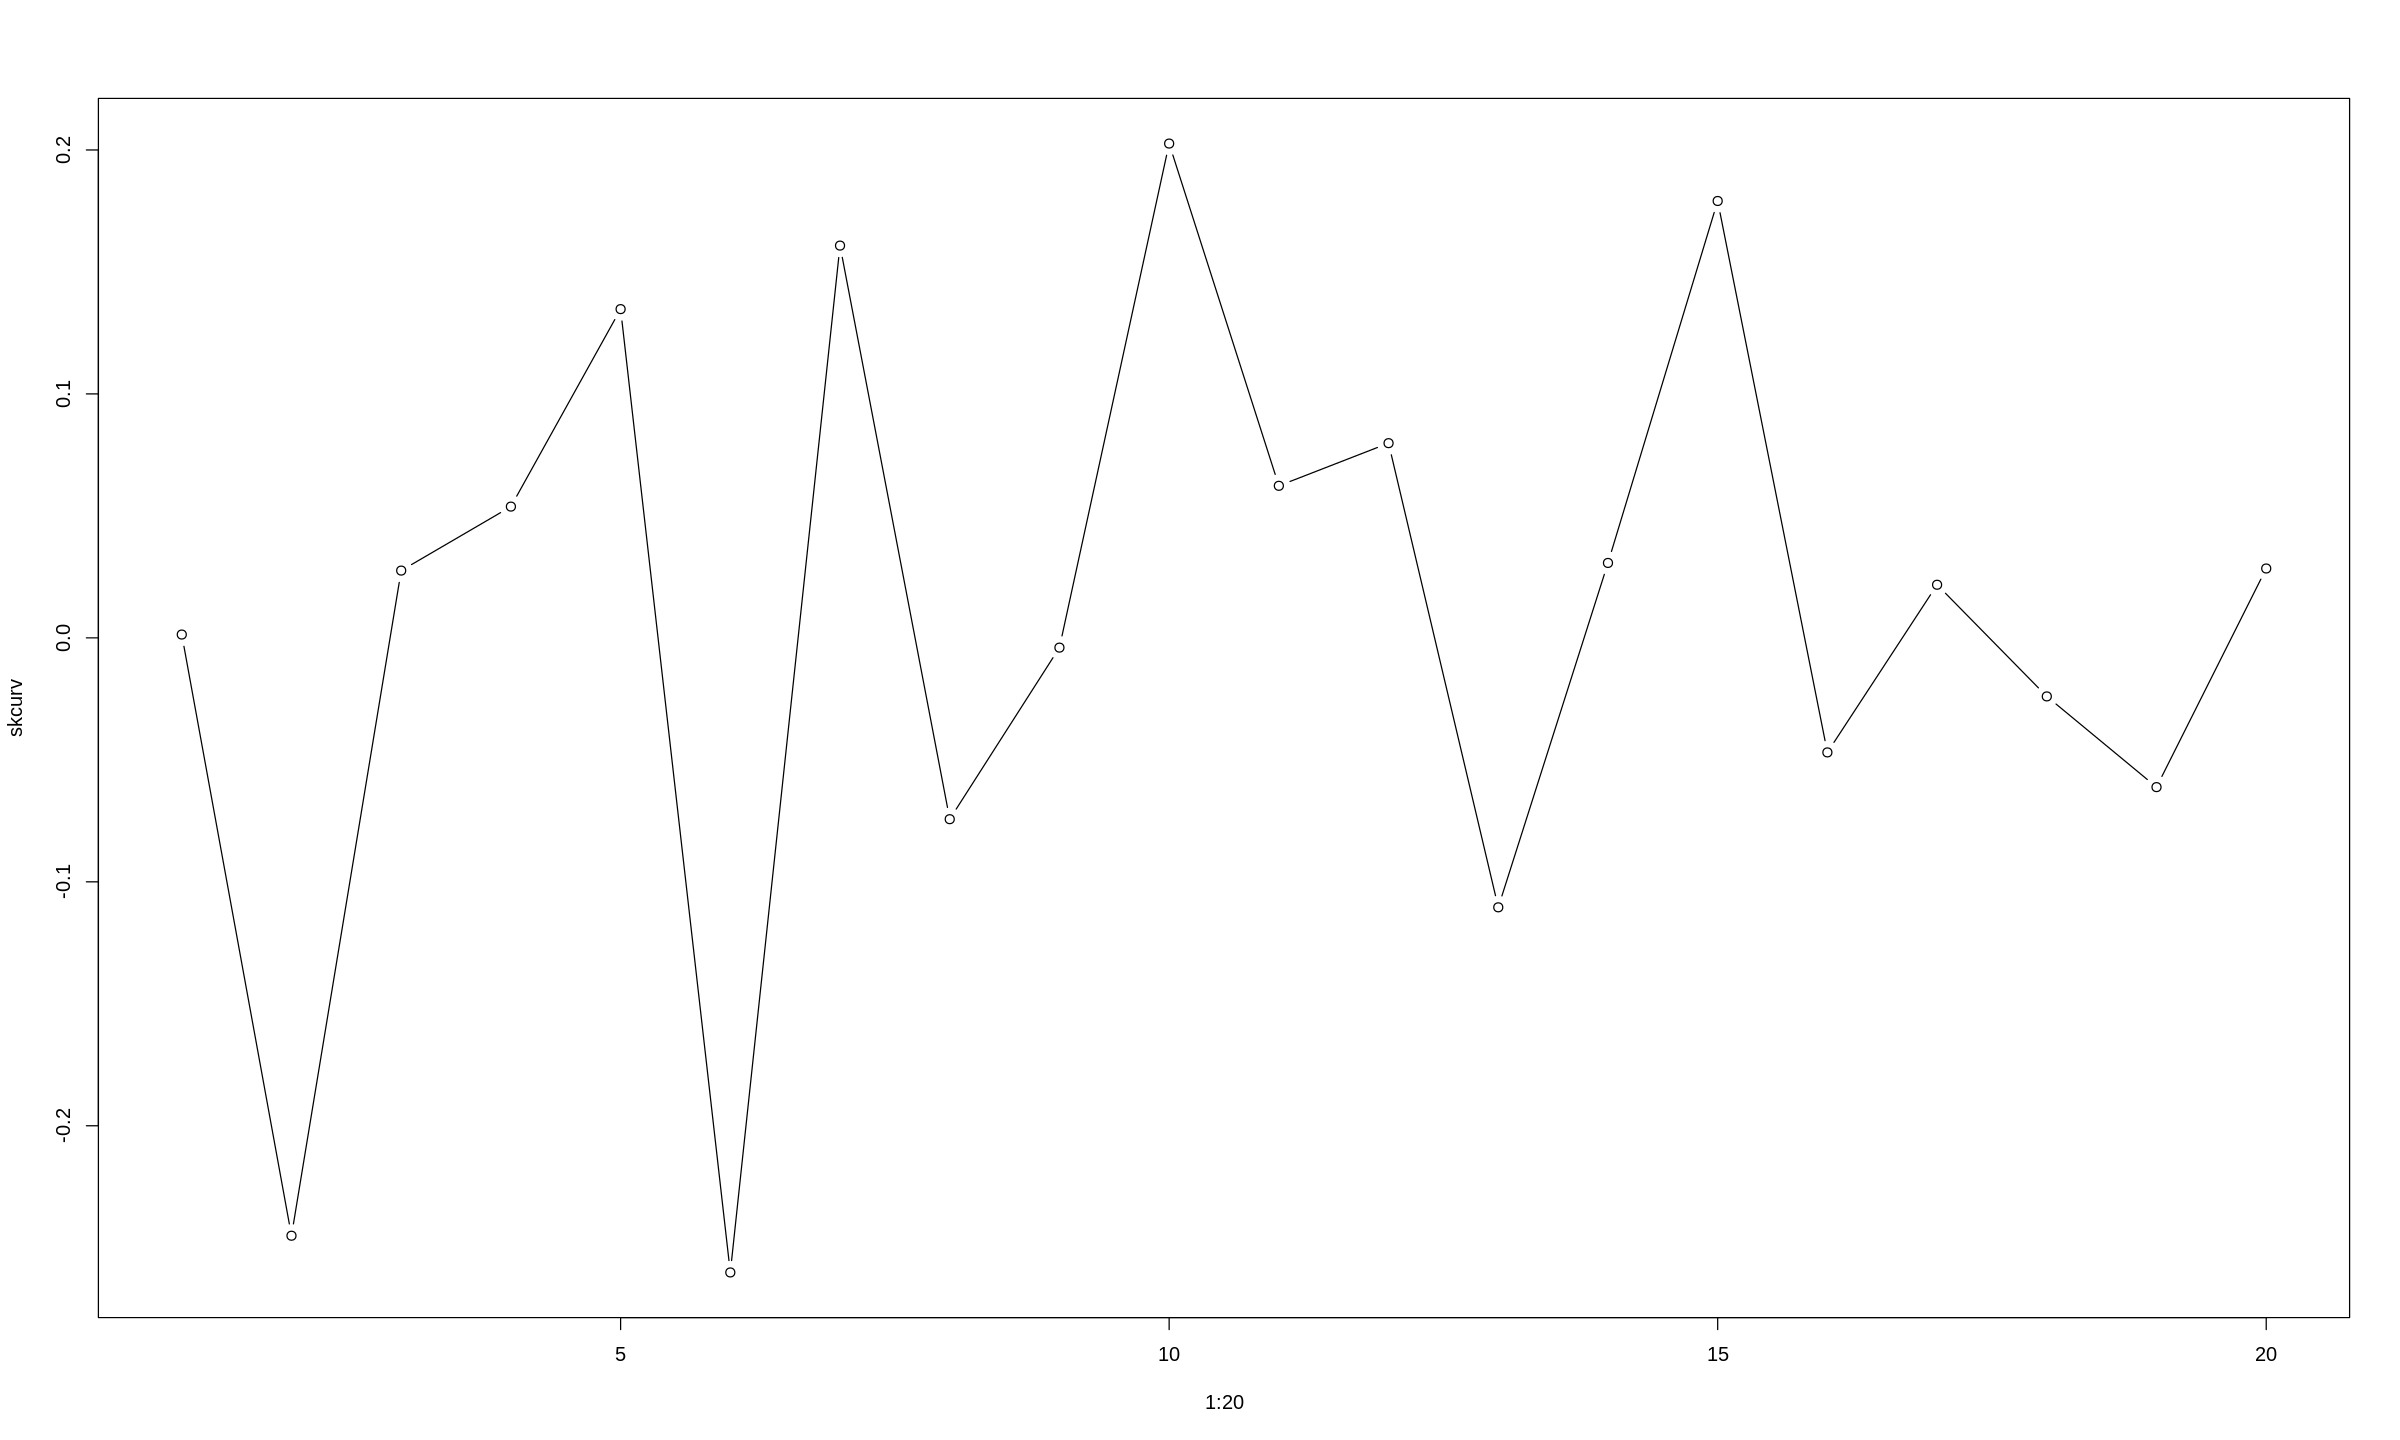

In [59]:
fordiff <- function(x) x[2:length(x)] - x[1:(length(x)-1)]
skd <- fordiff(lsar$sk)
skdd <- fordiff(skd)
skcurv <- skdd[1:20] / (1+(skd[1:20])^2)^1.5
plot( 1:20, skcurv, type="b" )

In [60]:
top( cosines( dls[,1:6], grilledMenth.LSA[1:6] ), 10 )
# elenco dei 10 documenti sopra menzionati 
variety[top( cosines( dls[,1:6], grilledMenth.LSA[1:6] ), 20 )]
reviews[top(cosines(dls[,1:6], grilledMenth.LSA[1:6]), 20)]

[1] 84926 63677 55272 20436 54008 87828 89499 83779 89630 55526

[1] "Nebbiolo"          "Nebbiolo"          "Red Blend"        
 [4] "Nebbiolo"          "Nebbiolo"          "Red Blend"        
 [7] "Nebbiolo"          "Nebbiolo"          "Red Blend"        
[10] "Nebbiolo"          "Nebbiolo"          "Nerello Mascalese"
[13] "Nebbiolo"          "Sangiovese"        "Red Blend"        
[16] "Nebbiolo"          "Sangiovese"        "Sangiovese"       
[19] "Red Blend"         "Nebbiolo"

[1] "A few swirls of the glass release subtle aromas of tilled soil, underbrush, violet, leather and a whiff of menthol. The firm palate offers mature black cherry, licorice and a hint of cinnamon alongside firm, fine-grained tannins."                                                                           
 [2] "Aromas of underbrush, Porcini mushroom and a hint of toast emerge in the glass. The firm palate offers dried black cherry, star anise and mocha alongside assertive tannins."                                                                                                                                    
 [3] "Underbrush, scorched earth, toast and crushed stone aromas emerge in the glass along with a whiff of dried herb. The firm palate doles out cherries marinated in spirits, espresso, star anise and clove alongside chewy tannins."                                                                               
 [4] "This straightforward Barolo opens with aromas of rose, leather and menthol. The palate doles out sour cherry, crushed raspberry, cinnamon, clove and grilled sage alongside velvety tannins. There's not much complexity but it's savory and already enjoyable. Drink through 2019."                             
 [5] "This mountain Nebbiolo opens with aromas of forest floor, violet, menthol and a whiff of scorched earth. The taut palate offers dried black cherry, ground pepper and star anise alongside austere tannins that grip the finish."                                                                                
 [6] "Earthy aromas of underbrush, sunbaked soil, pressed violet and dried rosemary meld together with whiffs of espresso. The firm palate offers dried Marasca cherry, cranberry, star anise and a gamy note alongside close-grained tannins."                                                                        
 [7] "Alluring scents of rose, clove, exotic spice and a balsamic note of menthol take shape in the glass. The savory, structured palate doles out raspberry compote, black cherry, licorice and an espresso note alongside a backbone of firm but refined tannins. Don't even attempt this before 2020."              
 [8] "Menthol, mint, leather, forest floor and a balsamic note lead the way. The firm palate offers dried cherry, anise, bitter chocolate, chopped herb and clove alongside assertive tannins."                                                                                                                        
 [9] "Aromas of chopped herb, ground peppercorn, exotic spice and a balsamic note lift out of the glass. The taut palate offers dark cherry, raspberry, cinnamon and licorice alongside austere, fine-grained tannins."                                                                                                
[10] "Aromas of dried rose, menthol, espresso and mature berry lift out of the glass. The linear, tightly wound palate offers dried red cherry, cranberry and star anise alongside firm fine-grained tannins."                                                                                                         
[11] "Aromas of licorice, tilled soil, leather, underbrush, blackberry, camphor and a whiff of crushed rock lead the way. On the silky, gracious palate, clove, star anise and a hint of graphite back up a core of mature cherry while lithe tannins offer polished support."                                         
[12] "Vibrant and savory, this delivers wild cherry, dark raspberry, rosemary, mint and Mediterranean herb flavors alongside firm tannins. It closes on a licorice note."                                                                                                                                              
[13] "Rose, violet, game and tilled earth aromas waft from the glass. The savory, accessible palate offers black cherry, crushed raspberry and cinnamon alongside firm but polished tannins. Enjoy through 2016. Polaner Selections, Rare Wine Co."              